# Intro

La premisa principal de este proyecto era desarrollar a través de datos el impacto sociocultural de la Inteligencia Artificial, los robots y las Tecnologías de la Información en nuestro país. 
Considerando el crecimiento y el avance exponencial que han sufrido estas herramientas hasta el día de hoy y empatizando con las preocupaciones de la sociedad con respecto a la invasión de esta nueva forma de vida que suplanta muchas de las actividades cotidianas como las veníamos conociendo, planteamos dos principales hipótesis: 


•	Las IA no quitan trabajo, sino que lo generan.

•	El uso continuado de las tecnologías afecta al correcto aprendizaje y a las habilidades sociales del ser humano.


A continuación se realizan una serie de extracciones de datos de portales abiertos gubernamentales, el Instituto Nacional de Estadística o el Observatorio Nacional de Tecnología y Sociedad, para demostrar más adelante cómo se responderán las hipótesis previamente planteadas.

Para comenzar, importamos todas las librerías con las que trabajaremos a lo largo del proyecto: 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import folium 
from folium import plugins
import ipywidgets
import geocoder 
import geopy 

TABLA PRIMERA: "Uso de Tecnologías y Robots en las empresas. Primer trimestre de 2022"

En esta tabla se reflejan los usos que le dan las empresas de hoy en día a las Tecnologías e Inteligencias Artificiales según el sector. Esto es meramente informativo, con el objetivo de mostrar la implementación que se ha llevado a cabo en las diferentes profesiones de la automatización de procesos. 

En el caso de España, se sitúa en torno a un 53% (2019), siendo líder en Europa, según un análisis de [Randstand Workmonitor](https://www.randstad.es/tendencias360/los-beneficios-de-la-ia-para-el-empleo/)

In [74]:
usos_tic_empresas = pd.read_csv('./data/Uso de TIC en las empresas. Empresas con 10 o más empleados. Primer trimestre de 2022.csv', sep= "\t")

In [75]:
usos_tic_empresas

,"Agrupación de actividad (excepto CNAE 56, 64-66 y 95.1)",Principales variables,Tamaño de la empresa,Total
0,Total Empresas,H.1 % empresas que utiliza algún tipo de robot,Total,"8,32"
1,Total Empresas,H.1 % empresas que utiliza algún tipo de robot,De 10 a 49,"6,83"
2,Total Empresas,H.1 % empresas que utiliza algún tipo de robot,De 50 a 249,"13,55"
3,Total Empresas,H.1 % empresas que utiliza algún tipo de robot,De 250 y más,"26,28"
4,Total Empresas,H.1.A % empresas que utilizan robots industria...,Total,"82,24"
...,...,...,...,...
675,"4. Sector TIC (261-264, 268, 465, 582, 61, 620...",H.3.E % de empresas por motivo para utilizar r...,De 250 y más,"52,30"
676,"4. Sector TIC (261-264, 268, 465, 582, 61, 620...",H.3.F % de empresas por motivo para utilizar r...,Total,"13,54"
677,"4. Sector TIC (261-264, 268, 465, 582, 61, 620...",H.3.F % de empresas por motivo para utilizar r...,De 10 a 49,"22,99"
678,"4. Sector TIC (261-264, 268, 465, 582, 61, 620...",H.3.F % de empresas por motivo para utilizar r...,De 50 a 249,"0,00"


In [76]:
#cambio el nombre de la columna porque resulta muy extenso y no es relevante para el análisis

usos_tic_empresas.rename(columns = {'Agrupación de actividad (excepto CNAE 56, 64-66 y 95.1)' : 'Agrupación de actividad'}, inplace=True)

In [77]:
tic_resumido= usos_tic_empresas[usos_tic_empresas['Tamaño de la empresa'] == 'De 250 y más']

In [78]:
'''hemos dejado las empresas más grandes que son las que suponen un cambio en el mercado, y a raíz de ahí hemos ordenado los valores 
columna de total, que es la que indica en porcentaje el número de empresas dentro de un mismo sector que emplean TIC e IA en el año 2022'''

tic_resumido.sort_values(by=['Total'], inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
#tengo que aplicar ajustes de visionado del df para que se vea toda la información de las columnas 

pd.set_option("max_columns", None)
pd.set_option('max_colwidth', None) 
pd.set_option("expand_frame_repr", False)

In [80]:
tic_resumido.iloc[0:5, ::]

#aquí quiero ver si realmente esos totales están vacíos, o después de ampliar el tamaño de columna sigue apareciendo como puntos suspensivos

,Agrupación de actividad,Principales variables,Tamaño de la empresa,Total
547,3.5. Actividades inmobiliarias (CNAE 68),H.3.C % de empresas por motivo para utilizar robots: Mejorar la seguridad en el trabajo (1),De 250 y más,..
527,3.5. Actividades inmobiliarias (CNAE 68),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,..
531,3.5. Actividades inmobiliarias (CNAE 68),H.1.B % empresas que utilizan robots de servicio (1),De 250 y más,..
535,3.5. Actividades inmobiliarias (CNAE 68),H.2 Número medio de robots industriales y de servicios (2),De 250 y más,..
539,3.5. Actividades inmobiliarias (CNAE 68),H.3.A % de empresas por motivo para utilizar robots: Alto coste de mano de obra (1),De 250 y más,..


In [81]:
#intento retirar esas filas porque no tienen valor útil
tic_resumido.dropna(inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
tic_resumido
#siguen apareciendo las filas con valores vacíos, por lo que a continuación sustituyo esos puntos suspensivos por NAN para después poder hacer un dropna que resulte efectivo

,Agrupación de actividad,Principales variables,Tamaño de la empresa,Total
547,3.5. Actividades inmobiliarias (CNAE 68),H.3.C % de empresas por motivo para utilizar robots: Mejorar la seguridad en el trabajo (1),De 250 y más,..
527,3.5. Actividades inmobiliarias (CNAE 68),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,..
531,3.5. Actividades inmobiliarias (CNAE 68),H.1.B % empresas que utilizan robots de servicio (1),De 250 y más,..
535,3.5. Actividades inmobiliarias (CNAE 68),H.2 Número medio de robots industriales y de servicios (2),De 250 y más,..
539,3.5. Actividades inmobiliarias (CNAE 68),H.3.A % de empresas por motivo para utilizar robots: Alto coste de mano de obra (1),De 250 y más,..
...,...,...,...,...
127,1.2 Coquerias y refino de petróleo produc. farmacéuticos caucho y plásticos Productos minerales no metálicos (CNAE 19-23),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"95,89"
207,"1.4. Productos informáticos, electrónico y ópticos material y equipo eléctrico maquinaria y equipo mecánico vehículos a motor material de transporte muebles industria manufacturera reparación maquinaria y equipo (CNAE 26-33)",H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"96,87"
87,1.1. Alimentación bebidas tabaco textil prendas vestir cuero y calzado madera y corcho papel artes gráficas y reproducción de soportes grabados (CNAE 10-18),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"97,58"
191,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.D % de empresas por motivo para utilizar robots: Asegurar alta precisión o calidad estandarizada de procesos y/o bienes y servicios producidos (1),De 250 y más,"98,55"


In [83]:
tic_resumido['Total'].replace('..', np.nan, inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
tic_resumido

,Agrupación de actividad,Principales variables,Tamaño de la empresa,Total
547,3.5. Actividades inmobiliarias (CNAE 68),H.3.C % de empresas por motivo para utilizar robots: Mejorar la seguridad en el trabajo (1),De 250 y más,NaN
527,3.5. Actividades inmobiliarias (CNAE 68),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,NaN
531,3.5. Actividades inmobiliarias (CNAE 68),H.1.B % empresas que utilizan robots de servicio (1),De 250 y más,NaN
535,3.5. Actividades inmobiliarias (CNAE 68),H.2 Número medio de robots industriales y de servicios (2),De 250 y más,NaN
539,3.5. Actividades inmobiliarias (CNAE 68),H.3.A % de empresas por motivo para utilizar robots: Alto coste de mano de obra (1),De 250 y más,NaN
...,...,...,...,...
127,1.2 Coquerias y refino de petróleo produc. farmacéuticos caucho y plásticos Productos minerales no metálicos (CNAE 19-23),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"95,89"
207,"1.4. Productos informáticos, electrónico y ópticos material y equipo eléctrico maquinaria y equipo mecánico vehículos a motor material de transporte muebles industria manufacturera reparación maquinaria y equipo (CNAE 26-33)",H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"96,87"
87,1.1. Alimentación bebidas tabaco textil prendas vestir cuero y calzado madera y corcho papel artes gráficas y reproducción de soportes grabados (CNAE 10-18),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"97,58"
191,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.D % de empresas por motivo para utilizar robots: Asegurar alta precisión o calidad estandarizada de procesos y/o bienes y servicios producidos (1),De 250 y más,"98,55"


In [85]:
tic_resumido.dropna(how= 'all', inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
tic_resumido.sort_values(by='Total', ascending=False, inplace=True)

In [87]:
tic_resumido

,Agrupación de actividad,Principales variables,Tamaño de la empresa,Total
167,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"98,55"
191,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.D % de empresas por motivo para utilizar robots: Asegurar alta precisión o calidad estandarizada de procesos y/o bienes y servicios producidos (1),De 250 y más,"98,55"
87,1.1. Alimentación bebidas tabaco textil prendas vestir cuero y calzado madera y corcho papel artes gráficas y reproducción de soportes grabados (CNAE 10-18),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"97,58"
207,"1.4. Productos informáticos, electrónico y ópticos material y equipo eléctrico maquinaria y equipo mecánico vehículos a motor material de transporte muebles industria manufacturera reparación maquinaria y equipo (CNAE 26-33)",H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"96,87"
127,1.2 Coquerias y refino de petróleo produc. farmacéuticos caucho y plásticos Productos minerales no metálicos (CNAE 19-23),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"95,89"
...,...,...,...,...
539,3.5. Actividades inmobiliarias (CNAE 68),H.3.A % de empresas por motivo para utilizar robots: Alto coste de mano de obra (1),De 250 y más,NaN
543,3.5. Actividades inmobiliarias (CNAE 68),H.3.B % de empresas por motivo para utilizar robots: Dificultades para contratar personal (1),De 250 y más,NaN
559,3.5. Actividades inmobiliarias (CNAE 68),H.3.F % de empresas por motivo para utilizar robots: Impuestos u otros incentivos gubernamentales (1),De 250 y más,NaN
555,3.5. Actividades inmobiliarias (CNAE 68),H.3.E % de empresas por motivo para utilizar robots: Ampliar la gama de bienes producidos o servicios prestados por la empresa (1),De 250 y más,NaN


In [88]:
#así podemos ver todas las actividades diferentes que emplean el uso de robots y dividir las tablas según actividad
tic_resumido['Agrupación de actividad'].unique()

array(['1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25)',
       '1.1. Alimentación bebidas tabaco textil prendas vestir cuero y calzado madera y corcho papel artes gráficas y reproducción de soportes grabados (CNAE 10-18)',
       '1.4. Productos informáticos, electrónico y ópticos material y equipo eléctrico maquinaria y equipo mecánico vehículos a motor material de transporte muebles industria manufacturera reparación maquinaria y equipo (CNAE 26-33)',
       '1.2 Coquerias y refino de petróleo produc. farmacéuticos caucho y plásticos Productos minerales no metálicos (CNAE 19-23)',
       '1. Total Industria (CNAE 10-39)',
       '2. Total Construcción (CNAE 41-43)',
       '3.1. Venta y reparación de vehículos de motor comercio al por mayor al por menor (CNAE 45-47)',
       'Total Empresas',
       '3.7. Actividades administrativas y servicios auxiliares (incl. agencias viajes) (CNAE 77-82)',
       '4. Sector TIC (261-264, 268, 465, 582, 61, 6201, 6202, 6203, 6209

In [89]:
#escojo cuatro sectores al azar para hacer una visión general, asignando a una variable el filtro para poder visualizarlo
metalurgia = tic_resumido[tic_resumido['Agrupación de actividad'] == '1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25)']

In [90]:
metalurgia

,Agrupación de actividad,Principales variables,Tamaño de la empresa,Total
167,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.1.A % empresas que utilizan robots industriales (1),De 250 y más,"98,55"
191,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.D % de empresas por motivo para utilizar robots: Asegurar alta precisión o calidad estandarizada de procesos y/o bienes y servicios producidos (1),De 250 y más,"98,55"
183,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.B % de empresas por motivo para utilizar robots: Dificultades para contratar personal (1),De 250 y más,"9,72"
187,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.C % de empresas por motivo para utilizar robots: Mejorar la seguridad en el trabajo (1),De 250 y más,"85,31"
163,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.1 % empresas que utiliza algún tipo de robot,De 250 y más,"69,02"
195,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.E % de empresas por motivo para utilizar robots: Ampliar la gama de bienes producidos o servicios prestados por la empresa (1),De 250 y más,"59,83"
179,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.A % de empresas por motivo para utilizar robots: Alto coste de mano de obra (1),De 250 y más,"52,69"
175,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.2 Número medio de robots industriales y de servicios (2),De 250 y más,"25,76"
171,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.1.B % empresas que utilizan robots de servicio (1),De 250 y más,"18,04"
199,1.3 Metalurgia fabricación de productos metálicos ( CNAE 24-25),H.3.F % de empresas por motivo para utilizar robots: Impuestos u otros incentivos gubernamentales (1),De 250 y más,"10,70"


In [91]:
#antes de hacer las visualizaciones convierto a float los strings de la columna Total

metalurgia['Total'] = [float(str(i).replace(",", ".")) for i in metalurgia['Total']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



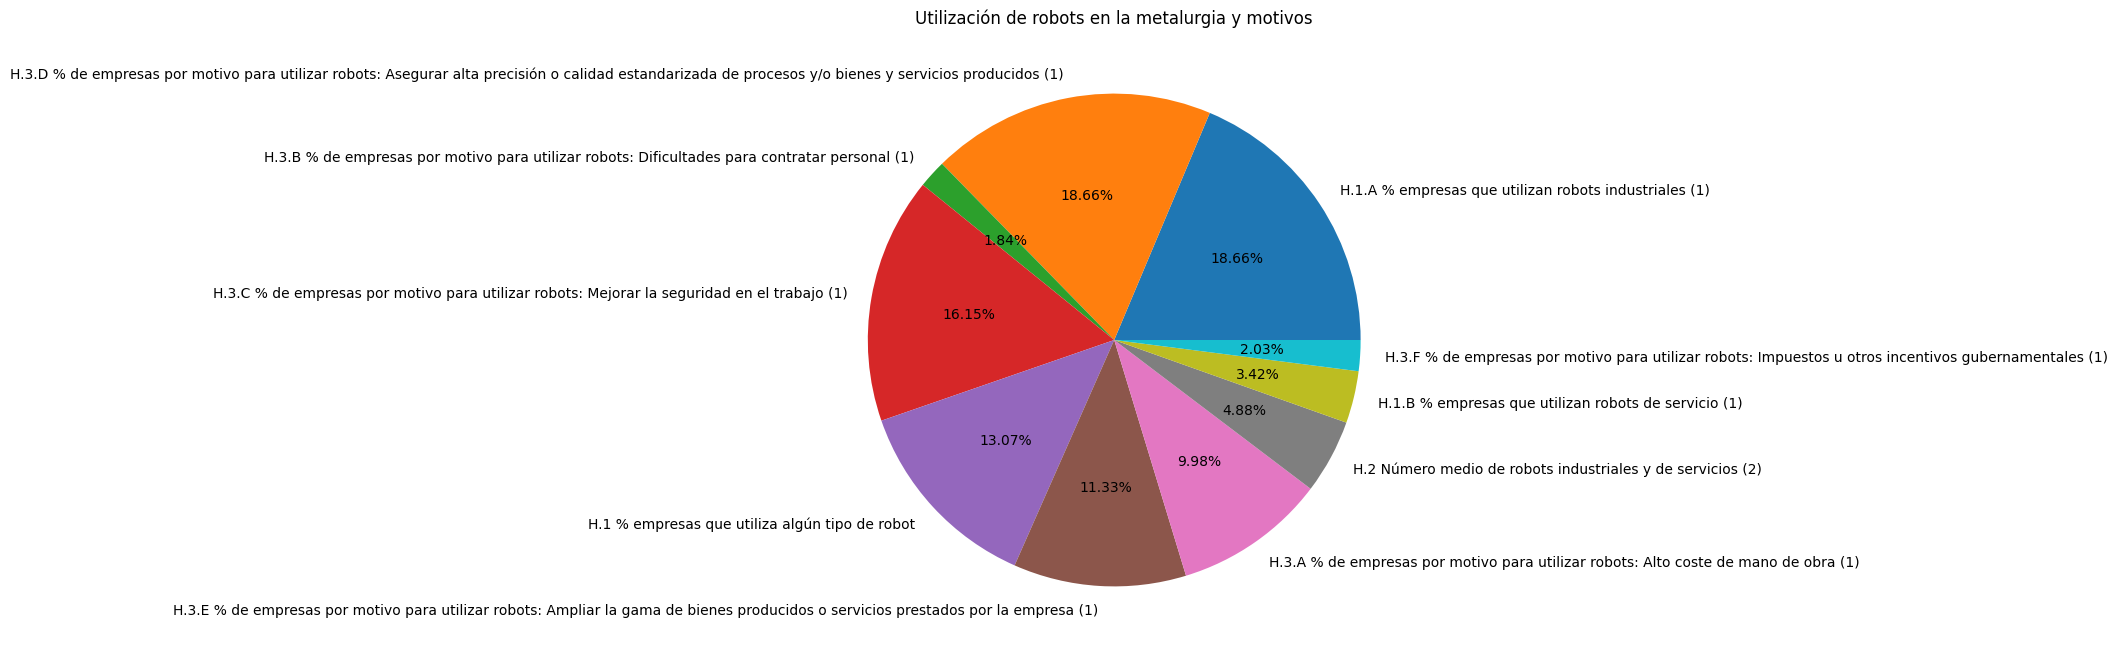

In [92]:
plt.figure(figsize=(8,8))
plt.pie(metalurgia['Total'],
        labels=metalurgia['Principales variables'],
        autopct='%1.2f%%')
plt.title('Utilización de robots en la metalurgia y motivos')
p=plt.gcf();

In [93]:
ciencias = tic_resumido[tic_resumido['Agrupación de actividad'] ==  '3.6. Actividades profesionales, científicas y técnicas (CNAE 69-75)']

In [94]:
ciencias['Total'] = [float(str(i).replace(",", ".")) for i in ciencias['Total']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



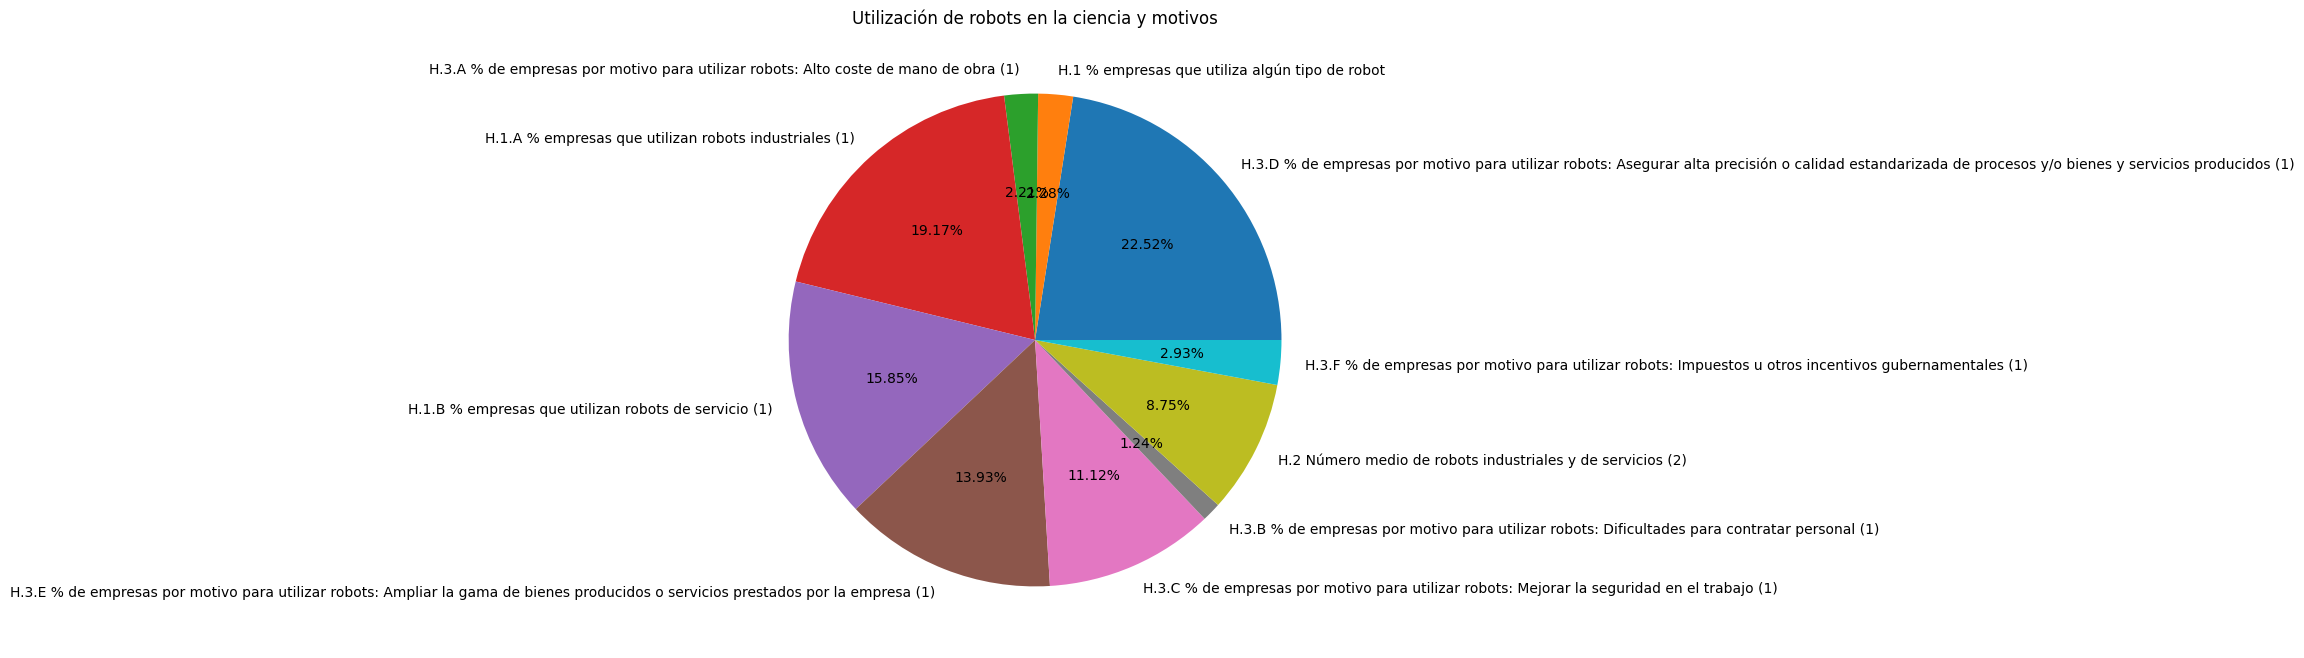

In [95]:
plt.figure(figsize=(8,8))
plt.pie(ciencias['Total'],
        labels=ciencias['Principales variables'],
        autopct='%1.2f%%')
plt.title('Utilización de robots en la ciencia y motivos')
p=plt.gcf();

In [96]:
construccion = tic_resumido[tic_resumido['Agrupación de actividad'] == '2. Total Construcción (CNAE 41-43)']

In [97]:
construccion['Total'] = [float(str(i).replace(",", ".")) for i in construccion['Total']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



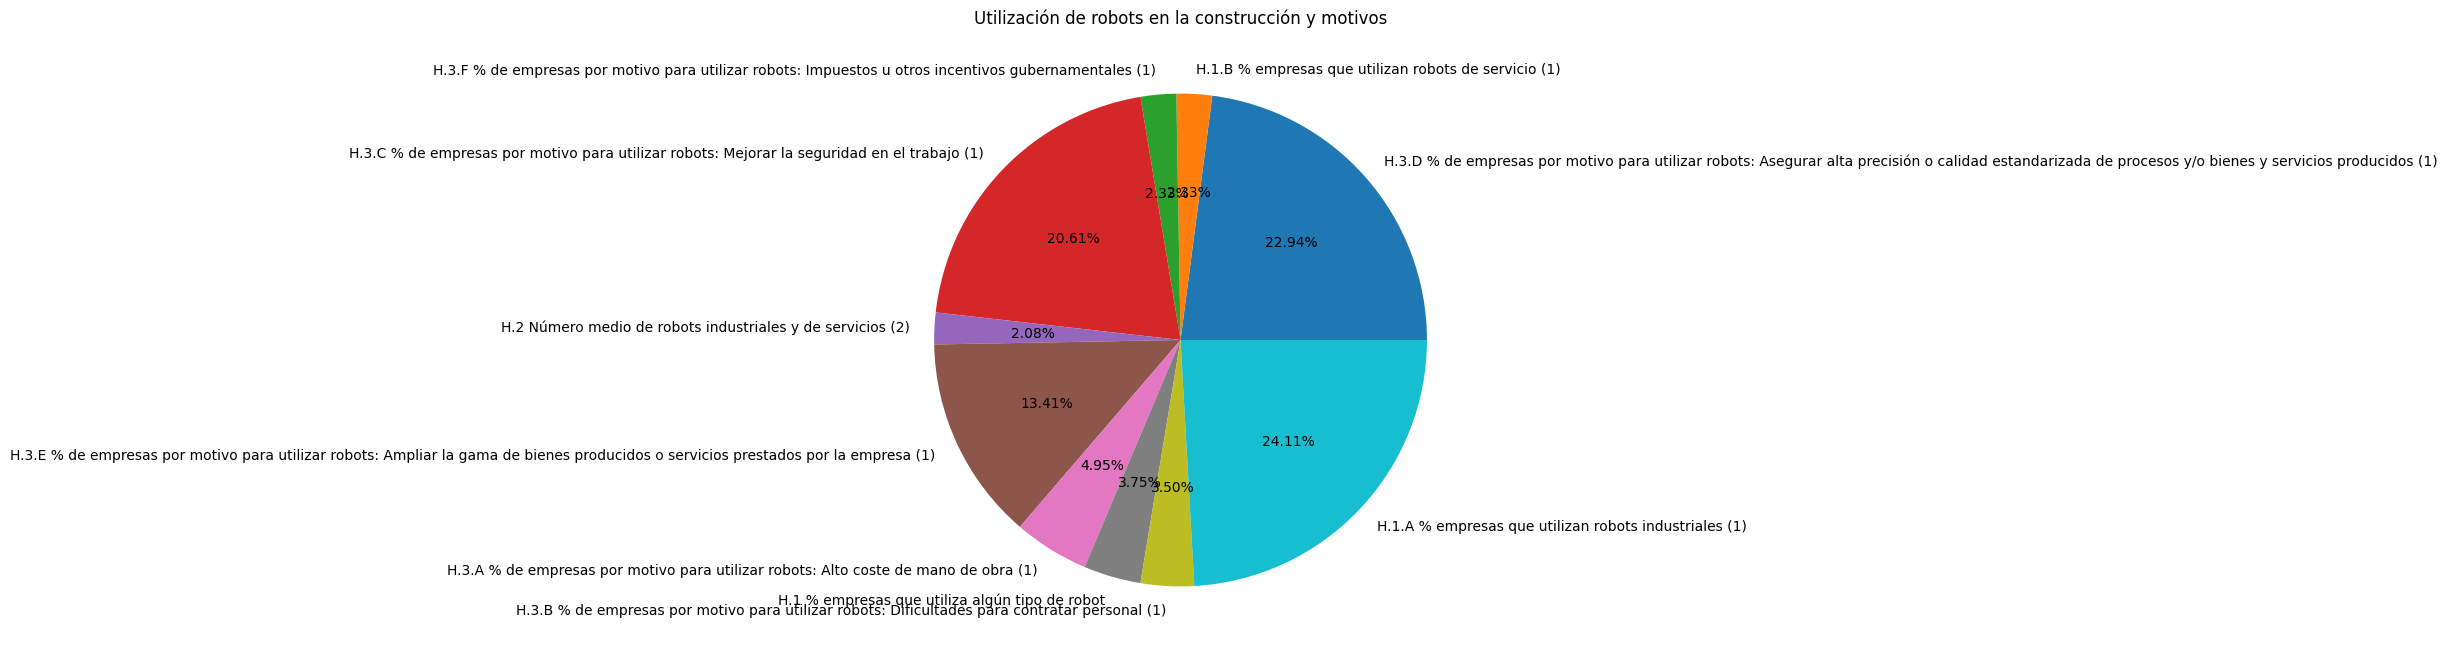

In [98]:
plt.figure(figsize=(8,8))
plt.pie(construccion['Total'],
        labels=construccion['Principales variables'],
        autopct='%1.2f%%')
plt.title('Utilización de robots en la construcción y motivos')
p=plt.gcf();

In [99]:
alojamientos = tic_resumido[tic_resumido['Agrupación de actividad'] == '3.3. Servicios de alojamiento (CNAE 55)']

In [100]:
alojamientos['Total'] = [float(str(i).replace(",", ".")) for i in alojamientos['Total']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



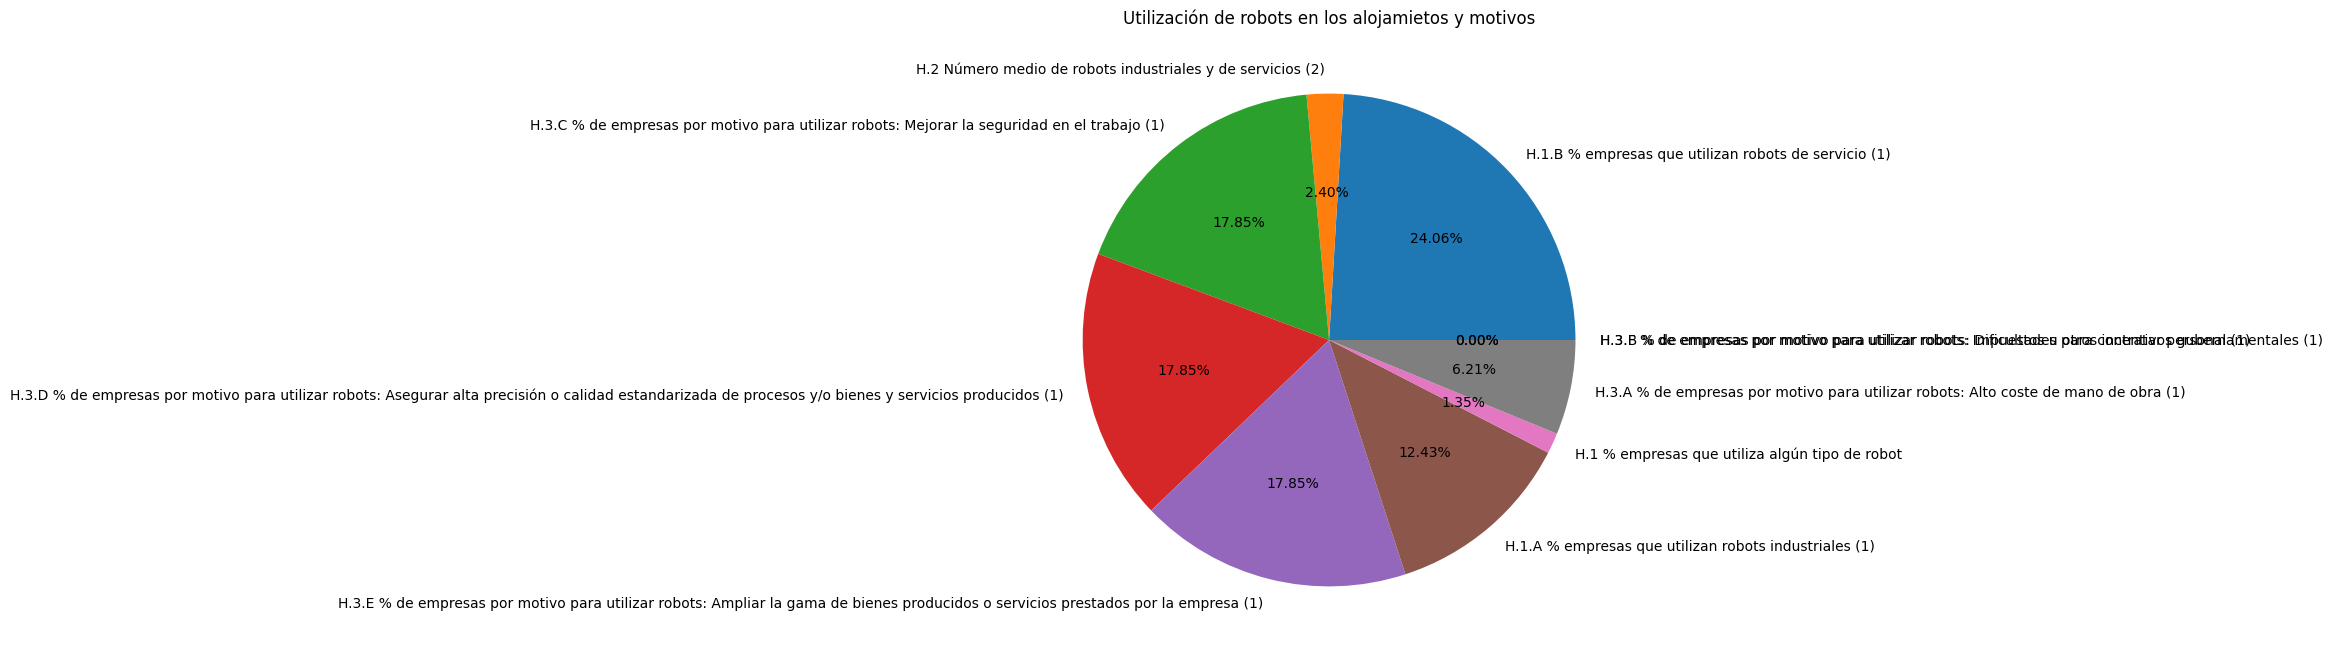

In [101]:
plt.figure(figsize=(8,8))
plt.pie(alojamientos['Total'],
        labels=alojamientos['Principales variables'],
        autopct='%1.2f%%')
plt.title('Utilización de robots en los alojamietos y motivos')
p=plt.gcf();

TABLA SEGUNDA: "Indicadores de TIC, año 2020"

En esta tabla a continuación mostramos el uso de especialistas en tecnologías e Inteligencia Artificial en los dos últimos años, se puede apreciar, por ejemplo, la cantidad total del sector empresarial en nuestro país que utiliza la tecnología de la nube y por lo tanto requieren de la profesión creada para ello, así como las empresas que analizan Big Data o las que necesitan un experto en Inteligencia Artificial.

In [102]:
uso_especialistas_tic = pd.read_csv("./data/Indicadores del sector de tecnologías de la información y las comunicaciones (TIC). Año 2020.csv", sep= ";")

In [103]:
#separo las tablas porque al haber valores numéricos que expresan porcentaje y otros que expresan euros, hay una descompensación en la visualización

uso_especialistas_tic.drop([22, 23, 24, 25], inplace=True)

In [104]:
uso_especialistas_tic

,Período de referencia,Tipo de indicador,Sectores TIC,Total
0,2020- Primer trimestre 2021,% de empresas que emplean especialistas en TIC,TOTAL SECTOR TIC,"65,6"
1,2020- Primer trimestre 2021,% de empresas que emplean especialistas en TIC,TOTAL SECTOR EMPRESARIAL,"16,4"
2,2020- Primer trimestre 2021,% de empresas con mujeres especialistas TIC (2),TOTAL SECTOR TIC,"61,2"
3,2020- Primer trimestre 2021,% de empresas con mujeres especialistas TIC (2),TOTAL SECTOR EMPRESARIAL,"34,5"
4,2020- Primer trimestre 2021,% Empresas que disponen de conexión a Internet,TOTAL SECTOR TIC,"98,7"
5,2020- Primer trimestre 2021,% Empresas que disponen de conexión a Internet,TOTAL SECTOR EMPRESARIAL,"99,0"
6,2020- Primer trimestre 2021,% Empresas con conexión a Internet y sitio/página web (1),TOTAL SECTOR TIC,"94,5"
7,2020- Primer trimestre 2021,% Empresas con conexión a Internet y sitio/página web (1),TOTAL SECTOR EMPRESARIAL,"78,3"
8,2020- Primer trimestre 2021,% de empresas que utilizan Medios Sociales (1),TOTAL SECTOR TIC,"90,5"
9,2020- Primer trimestre 2021,% de empresas que utilizan Medios Sociales (1),TOTAL SECTOR EMPRESARIAL,"66,6"


In [105]:
trace1 = go.Bar(x = uso_especialistas_tic['Tipo de indicador'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR TIC'],
               y = uso_especialistas_tic['Total'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR TIC'],
               name = 'Porcentaje de uso de TIC en el sector TIC (2020 - 2021)',
               marker = dict(
                            line = dict(color='rgb(255,255,255)', width = 1.5)),
               text = uso_especialistas_tic['Tipo de indicador'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR EMPRESARIAL'])

trace2 = go.Bar(x = uso_especialistas_tic['Tipo de indicador'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR EMPRESARIAL'],
               y = uso_especialistas_tic['Total'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR EMPRESARIAL'],
               name = 'Porcentaje de uso de TIC en el total del sector empresarial (2020 - 2021)',
               marker = dict(
                            line = dict(color='yellow', width = 1.5)),
               text = uso_especialistas_tic['Tipo de indicador'][uso_especialistas_tic['Sectores TIC'] == 'TOTAL SECTOR EMPRESARIAL'])



data = [trace1, trace2]

layout = go.Layout(barmode = "group", title= 'Porcentaje de uso de TIC en las empresas 2020 - 2021', xaxis=dict(title='Indicadores'))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

TABLA TERCERA: 'Empresas que analizaron Big Data (% sobre el total de empresas)'

Aquí referenciamos el total de empresas que en nuestro país se dedican a analizar Big Data progresivamente a lo largo de los años y se aprecia en cuestión de seis años un aumento prácticamente que dobla el porcentaje inicial, lo que se traduce de nuevo en nuevos puestos específicos de la materia

In [106]:
big_data = pd.read_excel('./data/analisis big data.xlsx')

In [107]:
big_data.replace('-', np.nan, inplace=True)

In [108]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indicadores        74 non-null     object 
 1   Desagregaciones    74 non-null     object 
 2   Áreas Geográficas  74 non-null     object 
 3   Fuente             74 non-null     object 
 4   Periodos           0 non-null      float64
 5   Total año 2016     46 non-null     float64
 6   Total año 2017     20 non-null     float64
 7   Total año 2018     49 non-null     float64
 8   Total año 2019     20 non-null     float64
 9   Total año 2020     48 non-null     float64
 10  Total año 2021     20 non-null     float64
 11  Total año 2022     20 non-null     float64
dtypes: float64(8), object(4)
memory usage: 7.1+ KB


In [109]:
#eliminamos nuestra columna de nulos, la dejo comentada porque al volverlo a ejecutar y no existir, deja error
#big_data_sp.drop(columns=['Periodos'], inplace=True)

In [110]:
#filtramos por el órgano recolector de datos, que en el caso de España es el INE, para obtener los datos sólo de nuestro país
big_data_sp = big_data[big_data['Fuente'] == 'Instituto Nacional de Estadística (INE)']

In [111]:
big_data_sp.head()

,Indicadores,Desagregaciones,Áreas Geográficas,Fuente,Periodos,Total año 2016,Total año 2017,Total año 2018,Total año 2019,Total año 2020,Total año 2021,Total año 2022
2,Empresas que analizaron Big Data (% sobre el total de empresas),Total,Andalucía,Instituto Nacional de Estadística (INE),NaN,8.90,8.17,12.50,7.52,7.40,12.58,14.99
3,Empresas que analizaron Big Data (% sobre el total de empresas),Total,Aragón,Instituto Nacional de Estadística (INE),NaN,4.93,7.73,9.91,6.69,7.93,10.75,14.35
4,Empresas que analizaron Big Data (% sobre el total de empresas),Total,Asturias (Principado de),Instituto Nacional de Estadística (INE),NaN,4.67,4.82,9.60,7.01,5.75,10.07,14.07
6,Empresas que analizaron Big Data (% sobre el total de empresas),Total,Balears (Illes),Instituto Nacional de Estadística (INE),NaN,8.51,7.80,9.51,6.42,9.32,7.82,15.68
11,Empresas que analizaron Big Data (% sobre el total de empresas),Total,Canarias,Instituto Nacional de Estadística (INE),NaN,7.20,6.95,9.32,6.11,4.97,9.49,9.67


In [112]:
len(big_data_sp['Áreas Geográficas'])

20

Representamos con una gráfica *Bubble Chart* por cada año y por CCAA, la evolución del análisis Big Data en el país, representando el tamaño de las burbujas mayor, la mayor tendencia a analizar Big Data.

In [113]:
size = big_data_sp['Total año 2016']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2016'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2016'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.write_image("./data/bubble1.png", scale=1, width = 1920, height = 1080)

fig.show()

In [114]:
size = big_data_sp['Total año 2017']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2017'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2017'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.show()

In [115]:
size = big_data_sp['Total año 2018']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2018'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2018'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.show()

In [116]:
size = big_data_sp['Total año 2019']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2019'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2019'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.show()

In [117]:
size = big_data_sp['Total año 2020']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2020'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2020'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.show()

In [118]:
size = big_data_sp['Total año 2021']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2021'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2021'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)

fig.show()

In [119]:
size = big_data_sp['Total año 2022']

fig = go.Figure(data=[go.Scatter(
    x=big_data_sp['Áreas Geográficas'],
    y=big_data_sp['Total año 2022'],
    mode='markers',
    marker=dict(
        color= big_data_sp['Total año 2022'],
        size=size,
        sizeref=2.*max(size)/(12.**2),        
        showscale=True
        )       
)]
)
fig.write_image("./data/bubble4.png", scale=1, width = 1920, height = 1080)
fig.show()

TABLA CUARTA: "Resumen de datos por persona y uso de TIC"

In [120]:
uso_social_tic= pd.read_csv('./data/Resumen de datos de Personas por sexo, características socioeconómicas y tipo de uso de TIC..csv', sep= "\t")

In [121]:
uso_social_tic

,Sexo,Características socioeconómicas,Tipo de uso de TIC,Total
0,Ambos sexos,Total Personas,Total Personas,35.436.056
1,Ambos sexos,Total Personas,Personas que han utilizado el teléfono móvil,"99,2"
2,Ambos sexos,Total Personas,Personas que han utilizado Internet en los últimos 3 meses,"94,5"
3,Ambos sexos,Total Personas,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"92,9"
4,Ambos sexos,Total Personas,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"87,1"
...,...,...,...,...
589,Mujeres,Ingresos mensuales netos del hogar: NS/NR,Personas que han utilizado el teléfono móvil,"99,2"
590,Mujeres,Ingresos mensuales netos del hogar: NS/NR,Personas que han utilizado Internet en los últimos 3 meses,"92,3"
591,Mujeres,Ingresos mensuales netos del hogar: NS/NR,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"91,1"
592,Mujeres,Ingresos mensuales netos del hogar: NS/NR,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"85,3"


In [122]:
mujeres_tic = uso_social_tic[uso_social_tic['Sexo'] == 'Mujeres']

In [123]:
mujeres_tic.drop(columns=['Sexo'], inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
mujeres_tic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 396 to 593
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Características socioeconómicas  198 non-null    object
 1   Tipo de uso de TIC               198 non-null    object
 2   Total                            198 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [125]:
hombres_tic = uso_social_tic[uso_social_tic['Sexo'] == 'Hombres']

In [126]:
hombres_tic.drop(columns='Sexo', inplace=True)

In [127]:
#quiero dividir las categorías de uso según los ingresos, otra según estudios y otra según ocupación, necesito ver todos los valores de mi columna
hombres_tic['Características socioeconómicas'].values

array(['Total Personas', 'Total Personas', 'Total Personas',
       'Total Personas', 'Total Personas', 'Total Personas',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Analfabetos y primaria incompleta',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Educación Primaria',
       'Estudios terminados: Primera etapa de Educación Secundaria',
       'Estudios terminados: Primera etapa de Educación Secundaria',
       'Estudios terminados: Primera etapa de Educ

In [128]:
mujeres_tic[mujeres_tic['Características socioeconómicas'] == 'Ingresos mensuales netos del hogar: Menos de 900 euros']

,Características socioeconómicas,Tipo de uso de TIC,Total
558,Ingresos mensuales netos del hogar: Menos de 900 euros,Total Personas,2.829.094
559,Ingresos mensuales netos del hogar: Menos de 900 euros,Personas que han utilizado el teléfono móvil,"98,7"
560,Ingresos mensuales netos del hogar: Menos de 900 euros,Personas que han utilizado Internet en los últimos 3 meses,"87,4"
561,Ingresos mensuales netos del hogar: Menos de 900 euros,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"83,7"
562,Ingresos mensuales netos del hogar: Menos de 900 euros,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"74,7"
563,Ingresos mensuales netos del hogar: Menos de 900 euros,Personas que han comprado a través de Internet en los últimos 3 meses,"38,4"


In [129]:
mujeres_tic[mujeres_tic['Características socioeconómicas'] == 'Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros']

,Características socioeconómicas,Tipo de uso de TIC,Total
564,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Total Personas,5.167.875
565,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Personas que han utilizado el teléfono móvil,"98,8"
566,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Personas que han utilizado Internet en los últimos 3 meses,"93,6"
567,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"91,5"
568,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"84,1"
569,Ingresos mensuales netos del hogar: De 900 a menos de 1.600 euros,Personas que han comprado a través de Internet en los últimos 3 meses,"49,9"


In [130]:
mujeres_tic[mujeres_tic['Características socioeconómicas'] == 'Ingresos mensuales netos del hogar: 3.000 o más euros']

,Características socioeconómicas,Tipo de uso de TIC,Total
582,Ingresos mensuales netos del hogar: 3.000 o más euros,Total Personas,2.596.110
583,Ingresos mensuales netos del hogar: 3.000 o más euros,Personas que han utilizado el teléfono móvil,"99,8"
584,Ingresos mensuales netos del hogar: 3.000 o más euros,Personas que han utilizado Internet en los últimos 3 meses,"99,6"
585,Ingresos mensuales netos del hogar: 3.000 o más euros,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"99,4"
586,Ingresos mensuales netos del hogar: 3.000 o más euros,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"98,0"
587,Ingresos mensuales netos del hogar: 3.000 o más euros,Personas que han comprado a través de Internet en los últimos 3 meses,"76,2"


In [131]:
mujeres_tic[mujeres_tic['Características socioeconómicas'] == 'Situación laboral: Activos parados']

,Características socioeconómicas,Tipo de uso de TIC,Total
462,Situación laboral: Activos parados,Total Personas,2.178.436
463,Situación laboral: Activos parados,Personas que han utilizado el teléfono móvil,"100,0"
464,Situación laboral: Activos parados,Personas que han utilizado Internet en los últimos 3 meses,"95,6"
465,Situación laboral: Activos parados,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"93,3"
466,Situación laboral: Activos parados,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"87,4"
467,Situación laboral: Activos parados,Personas que han comprado a través de Internet en los últimos 3 meses,"44,0"


In [132]:
mujeres_tic[mujeres_tic['Características socioeconómicas'] == 'Situación laboral: Activos ocupados']

,Características socioeconómicas,Tipo de uso de TIC,Total
456,Situación laboral: Activos ocupados,Total Personas,9.577.007
457,Situación laboral: Activos ocupados,Personas que han utilizado el teléfono móvil,"99,9"
458,Situación laboral: Activos ocupados,Personas que han utilizado Internet en los últimos 3 meses,"99,0"
459,Situación laboral: Activos ocupados,Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses,"98,3"
460,Situación laboral: Activos ocupados,Personas que han utilizado Internet diariamente (al menos 5 días a la semana),"94,5"
461,Situación laboral: Activos ocupados,Personas que han comprado a través de Internet en los últimos 3 meses,"68,9"


In [133]:
mujeres_tic['Tipo de uso de TIC'].unique()

array(['Total Personas', 'Personas que han utilizado el teléfono móvil',
       'Personas que han utilizado Internet en los últimos 3 meses',
       'Personas que han utilizado Internet al menos una vez por semana en los últimos 3 meses',
       'Personas que han utilizado Internet diariamente (al menos 5 días a la semana)',
       'Personas que han comprado a través de Internet en los últimos 3 meses'],
      dtype=object)

In [134]:
#tras analizar las tablas divididas según características socieconómicas veo que no hay mucha diferencia entre unos y otros, no es destacable

TABLA QUINTA: 'Empresas que no emplean Inteligencia Artificial'

Observamos el pequeño porcentaje de empresas que no emplean IA en el año 2022 y los diferentes motivos

In [135]:
empresas_no_ia= pd.read_excel('./data/Empresas que no usan IA.xlsx')

In [136]:
empresas_no_ia

,Indicadores,Desagregaciones,Áreas Geográficas,Fuente,Periodos,Total año 2021
0,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Consideraciones éticas,España,Instituto Nacional de Estadística (INE),NaN,0.82
1,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Costes parecen demasiado altos,España,Instituto Nacional de Estadística (INE),NaN,3.11
2,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Disponibilidad o calidad de los datos,España,Instituto Nacional de Estadística (INE),NaN,2.24
3,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Falta de claridad sobre las consecuencias legales,España,Instituto Nacional de Estadística (INE),NaN,1.73
4,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Falta de conocimientos,España,Instituto Nacional de Estadística (INE),NaN,3.44
5,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),"Incompatibilidad con equipos, software o sistemas existentes",España,Instituto Nacional de Estadística (INE),NaN,1.75
6,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),No es útil para la empresa,España,Instituto Nacional de Estadística (INE),NaN,0.81
7,Empresas que no usan IA por motivo (% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial),Problemas con la protección de datos,España,Instituto Nacional de Estadística (INE),NaN,1.60


In [137]:
#elimino mi columna de valores nulos
empresas_no_ia.drop(columns=['Periodos'], inplace=True)

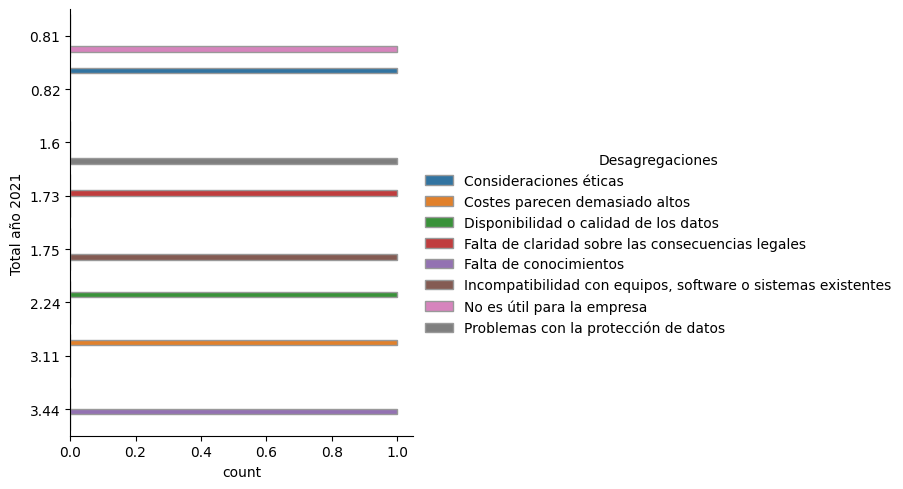

In [138]:
sns.catplot(
            y= 'Total año 2021',          
            hue= 'Desagregaciones',
            kind="count",
            edgecolor=".6",
            orient = "H",
            data=empresas_no_ia);

TABLA SEXTA: 'Encuesta de hábitos y prácticas culturales en España'

Con esta tabla de recapitulación del cambio en las prácticas culturales y que por ende, nos obligan a unirnos y estar en contacto con la sociedad, queríamos mostrar la evolución con el paso del tiempo de los hábitos: desciende lo físico y aumenta lo digital. La tabla se ha dividido a su vez en cuatro tablas para seccionar mejor el archivo y ver los cambios con detenimiento. En la última de las cuatro, encontramos lo referente a las nuevas tecnologías. Cambios como el consumo de prensa o lectura en digital o en Internet en lugar de la televisión o la radio.

In [139]:
habitos_culturales = pd.read_excel('./data/Encuesta de Hábitos y Prácticas Culturales en España. Síntesis de resultados.xlsx')

In [140]:
habitos_culturales

,Column1,Column2,2006-,2010-,2014-,2018-,2021-,2006-2,2010-3,2014-4,2018-5,2021-6,2006-7,2010-8,2014-9,2018-10,2021-11
0,NaN,NaN,2007,2011,2015,2019,2022,2007,2011,2015,2019,2022,2007,2011,2015,2019,2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MUSEOS, EXPOSICIONES",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y GALERÍAS DE ARTE (Visitaron),NaN,"38,2","37,9","39,4","46,7","25,5","38,1","38,1","38,8","46,5","26,5","38,2","37,6","40,1","46,9","24,6"
4,Museos,NaN,"31,2","30,6","33,2","40,5","20,1","31,0","30,7","32,3","40,0","20,8","31,3","30,5","34,2","40,9","19,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Danza, ballet, baile",NaN,"3,8","3,9","4,9",6.2,2.6,"2,0","2,1","2,6",2.7,1.1,"5,4","5,7","7,1",9.5,3.9
61,"Flamenco, baile español",NaN,-,-,"1,7",2.2,1.1,-,-,"1,1",0.9,0.6,-,-,"2,2",3.4,1.5
62,Tocar un instrumento musical,NaN,"5,9","8,0","7,8",9.6,6.5,"7,5","10,2","9,7",11.6,7.8,"4,4","5,9","6,0",7.7,5.3
63,Cantar en un coro,NaN,"2,8","2,4","2,4",2.7,1,"2,3","1,8","1,8",1.9,0.8,"3,2","2,9","3,0",3.6,1.3


In [141]:
habitos_culturales.drop(columns=['Column2'], inplace=True)

In [142]:
habitos_culturales

,Column1,2006-,2010-,2014-,2018-,2021-,2006-2,2010-3,2014-4,2018-5,2021-6,2006-7,2010-8,2014-9,2018-10,2021-11
0,NaN,2007,2011,2015,2019,2022,2007,2011,2015,2019,2022,2007,2011,2015,2019,2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MUSEOS, EXPOSICIONES",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y GALERÍAS DE ARTE (Visitaron),"38,2","37,9","39,4","46,7","25,5","38,1","38,1","38,8","46,5","26,5","38,2","37,6","40,1","46,9","24,6"
4,Museos,"31,2","30,6","33,2","40,5","20,1","31,0","30,7","32,3","40,0","20,8","31,3","30,5","34,2","40,9","19,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Danza, ballet, baile","3,8","3,9","4,9",6.2,2.6,"2,0","2,1","2,6",2.7,1.1,"5,4","5,7","7,1",9.5,3.9
61,"Flamenco, baile español",-,-,"1,7",2.2,1.1,-,-,"1,1",0.9,0.6,-,-,"2,2",3.4,1.5
62,Tocar un instrumento musical,"5,9","8,0","7,8",9.6,6.5,"7,5","10,2","9,7",11.6,7.8,"4,4","5,9","6,0",7.7,5.3
63,Cantar en un coro,"2,8","2,4","2,4",2.7,1,"2,3","1,8","1,8",1.9,0.8,"3,2","2,9","3,0",3.6,1.3


In [143]:
#renombramos las columnas para que sea visualmente menos caótico

In [144]:
habitos_culturales.rename(columns= {'Column1' : 'PRACTICA CULTURAL', '2006-' : '2006 - 2007', '2010-' : '2010 - 2011', '2014-' : '2014 - 2015', '2018-' : '2018 - 2019',
                                    '2021-' : '2021 - 2022', '2006-2' : '2006 - 2007_2', '2010-3' : '2010 - 2011_2', '2014-4' : '2014 - 2015_2',
                                    '2018-5' : '2018 - 2019_2',	'2021-6' : '2021 - 2022', '2006-7' : '2006 - 2007_3', '2010-8' : '2010 - 2011_3',
                                    '2014-9' : '2014 - 2015_3', '2018-10' : '2018 - 2019_3', '2021-11' : '2021 - 2022'}, inplace=True)

In [145]:
habitos_culturales.drop([0,1], inplace=True)

In [146]:
habitos_culturales.drop([2, 3], inplace=True)

In [147]:
habitos_culturales.reset_index(drop=True, inplace=True)

In [148]:
habitos_recort = habitos_culturales.iloc[::,0:6]

In [149]:
habitos_recort.reset_index(inplace=True, drop=True)

In [150]:
habitos_recort.columns


Index(['PRACTICA CULTURAL', '2006 - 2007', '2010 - 2011', '2014 - 2015',
       '2018 - 2019', '2021 - 2022'],
      dtype='object')

In [151]:
habitos_recort.replace('-', np.nan)

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
0,Museos,"31,2","30,6","33,2","40,5","20,1"
1,Exposiciones,"24,7","25,7","23,8","29,8","14,5"
2,Galerías de arte,"13,7","13,6","12,7","16,0","6,9"
3,MONUMENTOS Y YACIMIENTOS (Visitaron),"35,6","40,7","42,8","50,8","28,2"
4,Monumentos,"34,1","39,5","41,4","49,3","26,4"
...,...,...,...,...,...,...
56,"Danza, ballet, baile","3,8","3,9","4,9",6.2,2.6
57,"Flamenco, baile español",NaN,NaN,"1,7",2.2,1.1
58,Tocar un instrumento musical,"5,9","8,0","7,8",9.6,6.5
59,Cantar en un coro,"2,8","2,4","2,4",2.7,1


In [152]:
habitos_recort.reset_index(drop=True)

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
0,Museos,"31,2","30,6","33,2","40,5","20,1"
1,Exposiciones,"24,7","25,7","23,8","29,8","14,5"
2,Galerías de arte,"13,7","13,6","12,7","16,0","6,9"
3,MONUMENTOS Y YACIMIENTOS (Visitaron),"35,6","40,7","42,8","50,8","28,2"
4,Monumentos,"34,1","39,5","41,4","49,3","26,4"
...,...,...,...,...,...,...
56,"Danza, ballet, baile","3,8","3,9","4,9",6.2,2.6
57,"Flamenco, baile español",-,-,"1,7",2.2,1.1
58,Tocar un instrumento musical,"5,9","8,0","7,8",9.6,6.5
59,Cantar en un coro,"2,8","2,4","2,4",2.7,1


En todas las tablas hemos tenido que convertir los objetos (números, valores) de las columnas a tipo float, porque el programa los consideraba string por separar los decimales con comas en lugar de puntos

In [153]:
habitos_recort

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
0,Museos,"31,2","30,6","33,2","40,5","20,1"
1,Exposiciones,"24,7","25,7","23,8","29,8","14,5"
2,Galerías de arte,"13,7","13,6","12,7","16,0","6,9"
3,MONUMENTOS Y YACIMIENTOS (Visitaron),"35,6","40,7","42,8","50,8","28,2"
4,Monumentos,"34,1","39,5","41,4","49,3","26,4"
...,...,...,...,...,...,...
56,"Danza, ballet, baile","3,8","3,9","4,9",6.2,2.6
57,"Flamenco, baile español",-,-,"1,7",2.2,1.1
58,Tocar un instrumento musical,"5,9","8,0","7,8",9.6,6.5
59,Cantar en un coro,"2,8","2,4","2,4",2.7,1


In [154]:
habitos_recort_1 = habitos_recort[0:15]

In [155]:
habitos_recort_1['2006 - 2007'].replace(',', '.', inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
habitos_recort_1['2010 - 2011'].replace(',', '.', inplace=True)
habitos_recort_1['2014 - 2015'].replace(',', '.', inplace=True)
habitos_recort_1['2018 - 2019'].replace(',', '.', inplace=True)
habitos_recort_1['2021 - 2022'].replace(',', '.', inplace=True)

In [157]:
habitos_recort_1['2006 - 2007'].replace('-', np.nan, inplace=True)

In [158]:
habitos_recort_1['2006 - 2007'] = [float(str(i).replace(",", ".")) for i in habitos_recort_1['2006 - 2007']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
habitos_recort_1['2006 - 2007'] = [float(str(i).replace(",", ".")) for i in habitos_recort_1['2006 - 2007']]
habitos_recort_1['2010 - 2011'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_1['2010 - 2011']]
habitos_recort_1['2014 - 2015'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_1['2014 - 2015']]
habitos_recort_1['2018 - 2019'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_1['2018 - 2019']]
habitos_recort_1['2021 - 2022'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_1['2021 - 2022']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [160]:
#habitos_recort_1.drop(columns = 'index', inplace=True) aquí pasa lo mismo que anteriormente, al volver ejecutar el código y estar borrado, da error

In [161]:
habitos_recort_1['2006 - 2007'].dtype

dtype('float64')

In [162]:
habitos_recort_1.set_index('PRACTICA CULTURAL', inplace=True, drop = True)

In [163]:
habitos_recort_1

,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
PRACTICA CULTURAL,,,,,
Museos,31.2,30.6,33.2,40.5,20.1
Exposiciones,24.7,25.7,23.8,29.8,14.5
Galerías de arte,13.7,13.6,12.7,16.0,6.9
MONUMENTOS Y YACIMIENTOS (Visitaron),35.6,40.7,42.8,50.8,28.2
Monumentos,34.1,39.5,41.4,49.3,26.4
Yacimientos arqueológicos,13.0,13.9,16.6,21.8,11.6
ARCHIVOS (Visitaron),3.9,5.0,5.6,7.1,3.5
BIBLIOTECAS (Fueron o accedieron),19.2,24.9,25.6,26.8,18.4
Ir a una biblioteca,17.6,20.5,22.7,23.0,15.0


In [164]:
#después de haber pasado los valores vacíos a nan, y haber convertido los dígitos a float, podemos trabajar las tablas

Todas las tablas de las prácticas culturales las hemos representado con histogramas, en todas se asocian los mismos colores a los mismos bienios para que sea más fácil la identificación del cambio. En la mayoría podemos observar un despunte en los años 2018 - 2019 de actividades culturales, lo que asociamos a aquella recuperación de la crisis que estaba asomando cabeza en los años previos al estallido de la pandemia de *CoVID-19*. Para que finalmente decaiga de sobremanera en los años actuales.

In [165]:
habitos_recort_1.index

Index(['Museos', 'Exposiciones', 'Galerías de arte',
       'MONUMENTOS Y YACIMIENTOS (Visitaron)', 'Monumentos',
       'Yacimientos arqueológicos', 'ARCHIVOS (Visitaron)',
       'BIBLIOTECAS (Fueron o accedieron)', 'Ir a una biblioteca',
       'Acceder por Internet', 'LECTURA (Leyeron libros)',
       'Relacionados con la profesión o estudios',
       'No relacionados con la profesión o estudios',
       'En formato papel (Suelen utilizar)',
       'En formato digital (Suelen utilizar)'],
      dtype='object', name='PRACTICA CULTURAL')

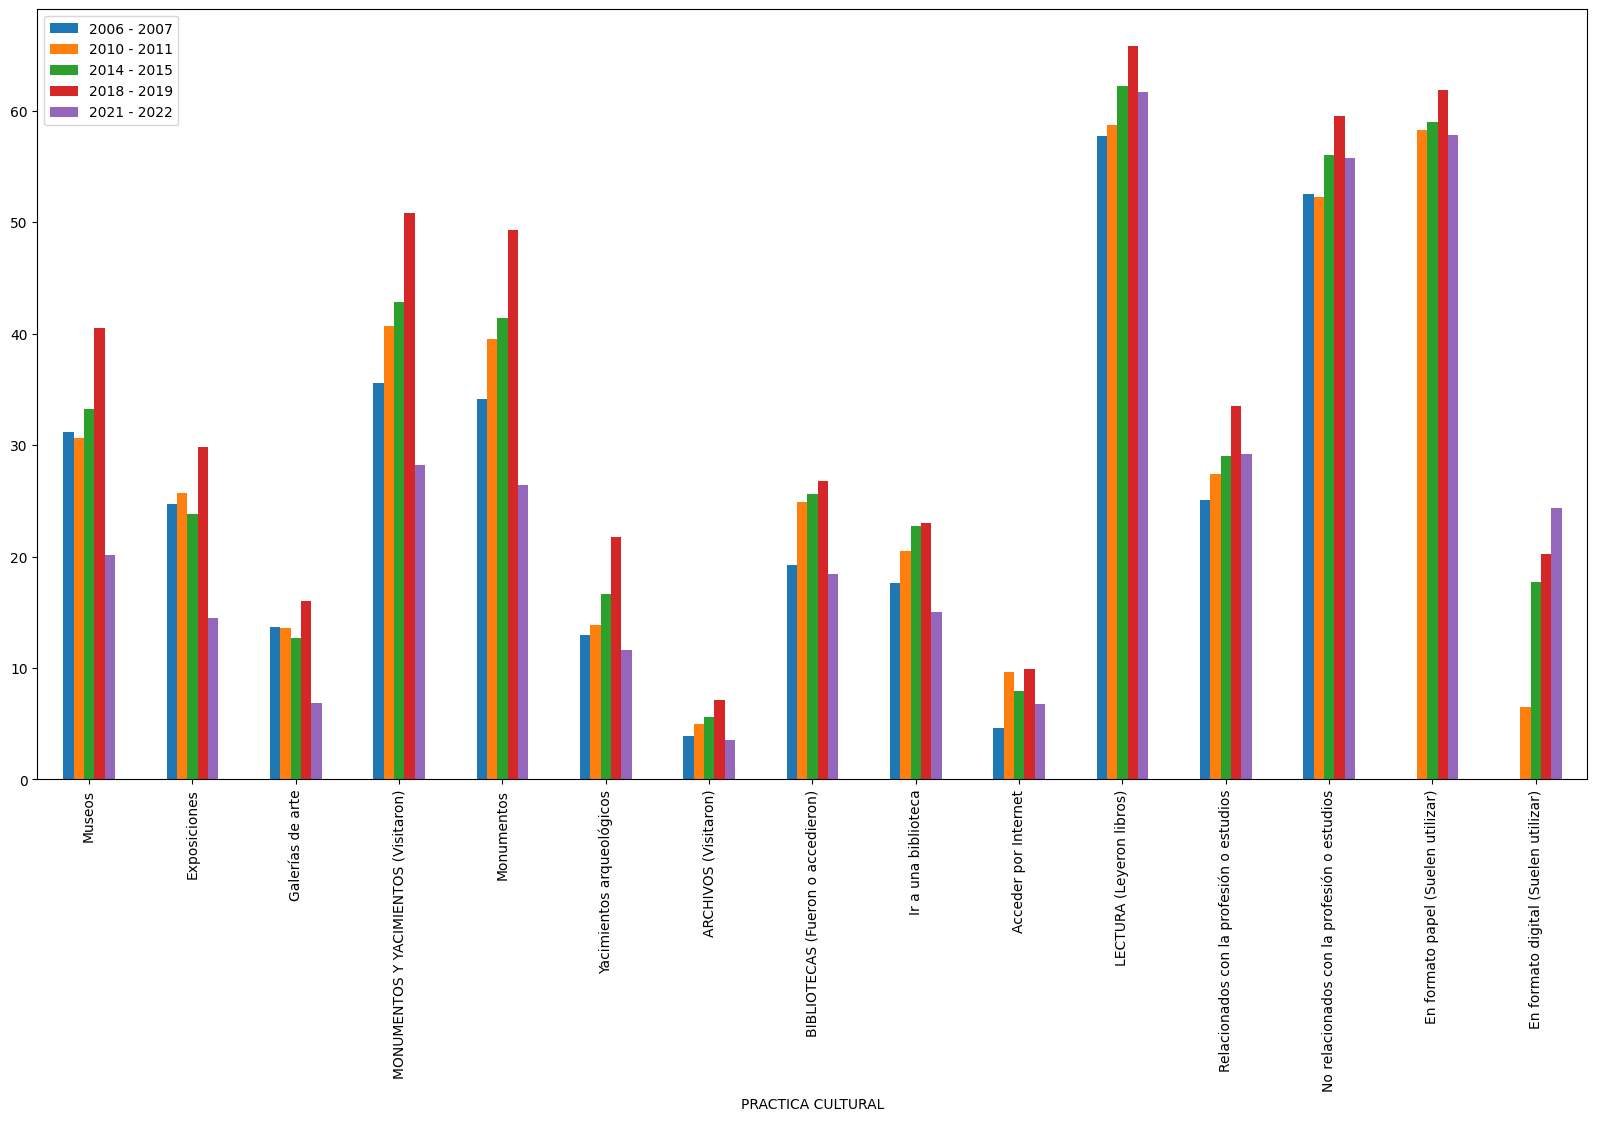

In [166]:
habitos_recort_1.plot(kind="bar", figsize = (20,10 ));

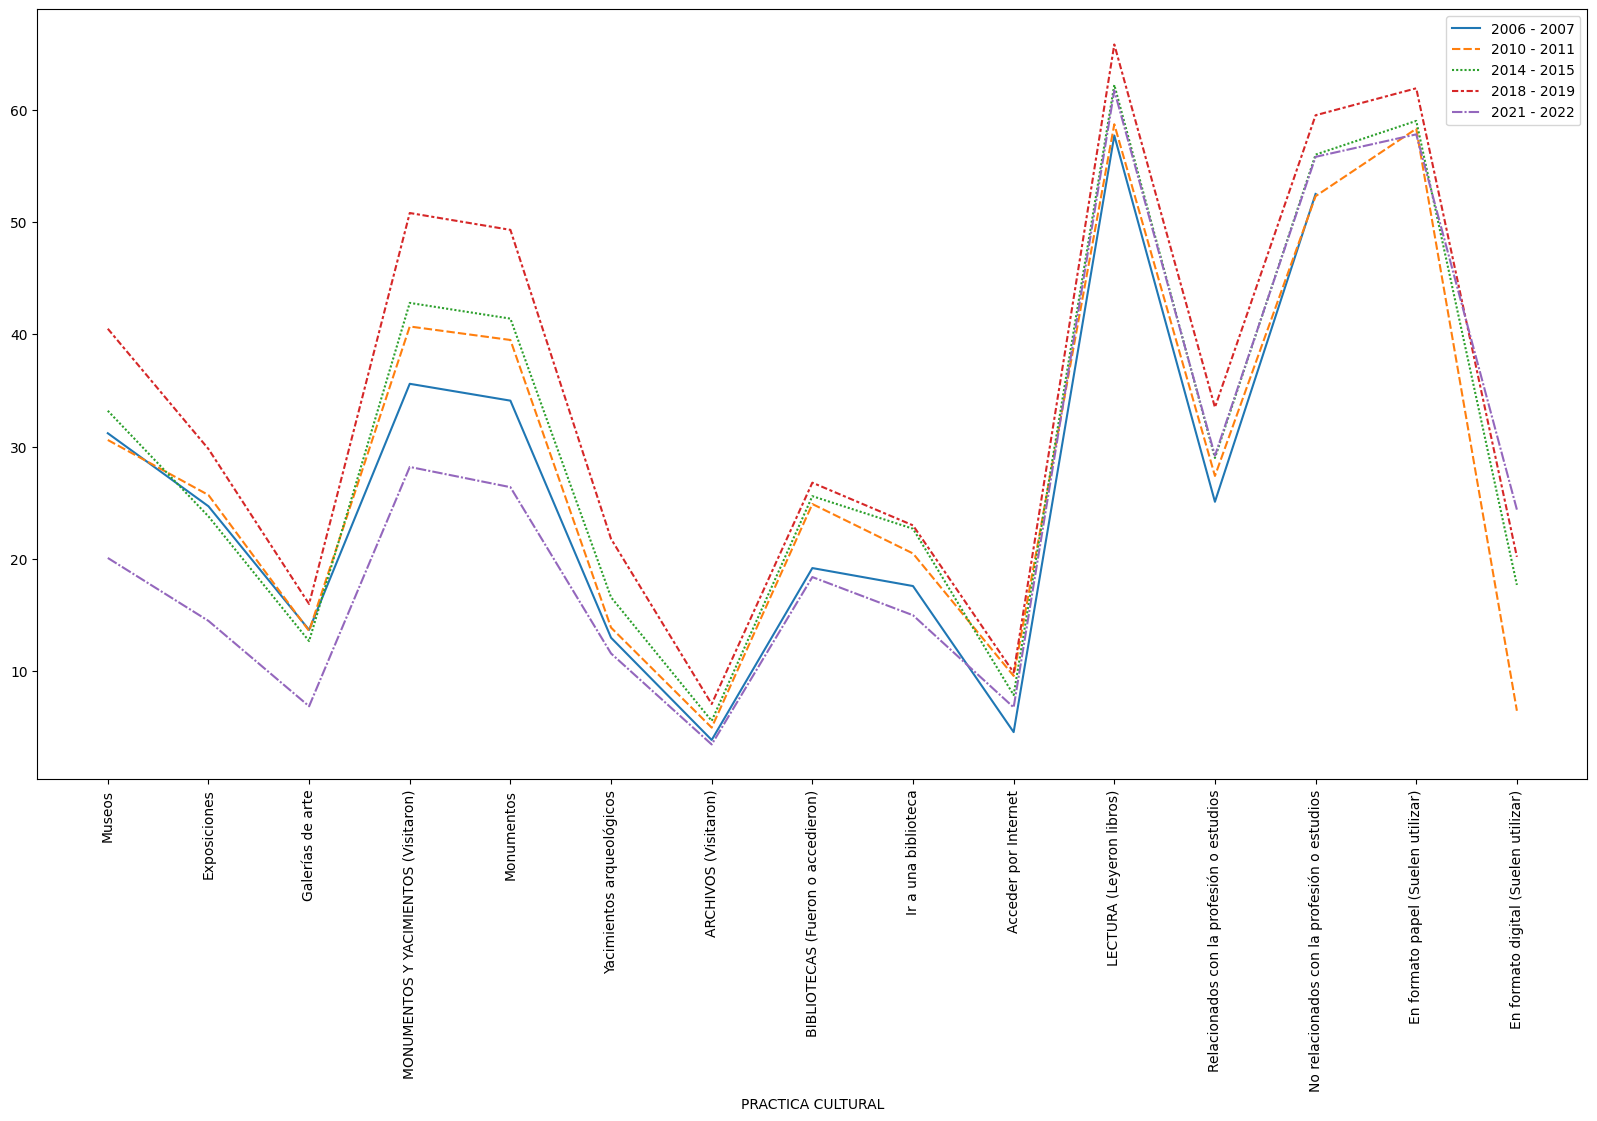

In [167]:
plt.figure(figsize = (20,10))
sns.lineplot(data = habitos_recort_1);
plt.xticks(rotation = 90);

In [168]:
habitos_recort_2 = habitos_recort[15:30]

In [169]:
habitos_recort_2.drop(index= [27, 28, 29], inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
habitos_recort_2.replace('-', np.nan, inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
habitos_recort_2

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
15,Directamente de Internet (Suelen utilizar),NaN,"4,1","5,7","9,9","8,6"
16,ARTES ESCÉNICAS Y MUSICALES (Asistieron),"45,5","43,7","43,5","46,8","19,9"
17,ARTES ESCÉNICAS (Asistieron),"29,0","27,8","29,9","30,8","10,5"
18,Teatro,"19,1","19,0","23,2","24,5","8,2"
19,Ópera,"2,7","2,6","2,6","3,3","0,9"
20,Zarzuela,"1,9","1,6","1,8","1,5","0,4"
21,Ballet / danza,"5,1","6,1","7,0","8,0","2,0"
22,Circo,"10,6","8,2","7,7","7,3","1,6"
23,ARTES MUSICALES (Asistieron),"31,2","30,2","29,2","34,2","12,9"
24,Conciertos de música clásica,"8,4","7,7","8,6","9,4","3,9"


In [172]:
habitos_recort_2['2006 - 2007'] = [float(str(i).replace(",", ".")) for i in habitos_recort_2['2006 - 2007']]
habitos_recort_2['2010 - 2011'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_2['2010 - 2011']]
habitos_recort_2['2014 - 2015'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_2['2014 - 2015']]
habitos_recort_2['2018 - 2019'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_2['2018 - 2019']]
habitos_recort_2['2021 - 2022'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_2['2021 - 2022']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [173]:
habitos_recort_2

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
15,Directamente de Internet (Suelen utilizar),NaN,4.1,5.7,9.9,8.6
16,ARTES ESCÉNICAS Y MUSICALES (Asistieron),45.5,43.7,43.5,46.8,19.9
17,ARTES ESCÉNICAS (Asistieron),29.0,27.8,29.9,30.8,10.5
18,Teatro,19.1,19.0,23.2,24.5,8.2
19,Ópera,2.7,2.6,2.6,3.3,0.9
20,Zarzuela,1.9,1.6,1.8,1.5,0.4
21,Ballet / danza,5.1,6.1,7.0,8.0,2.0
22,Circo,10.6,8.2,7.7,7.3,1.6
23,ARTES MUSICALES (Asistieron),31.2,30.2,29.2,34.2,12.9
24,Conciertos de música clásica,8.4,7.7,8.6,9.4,3.9


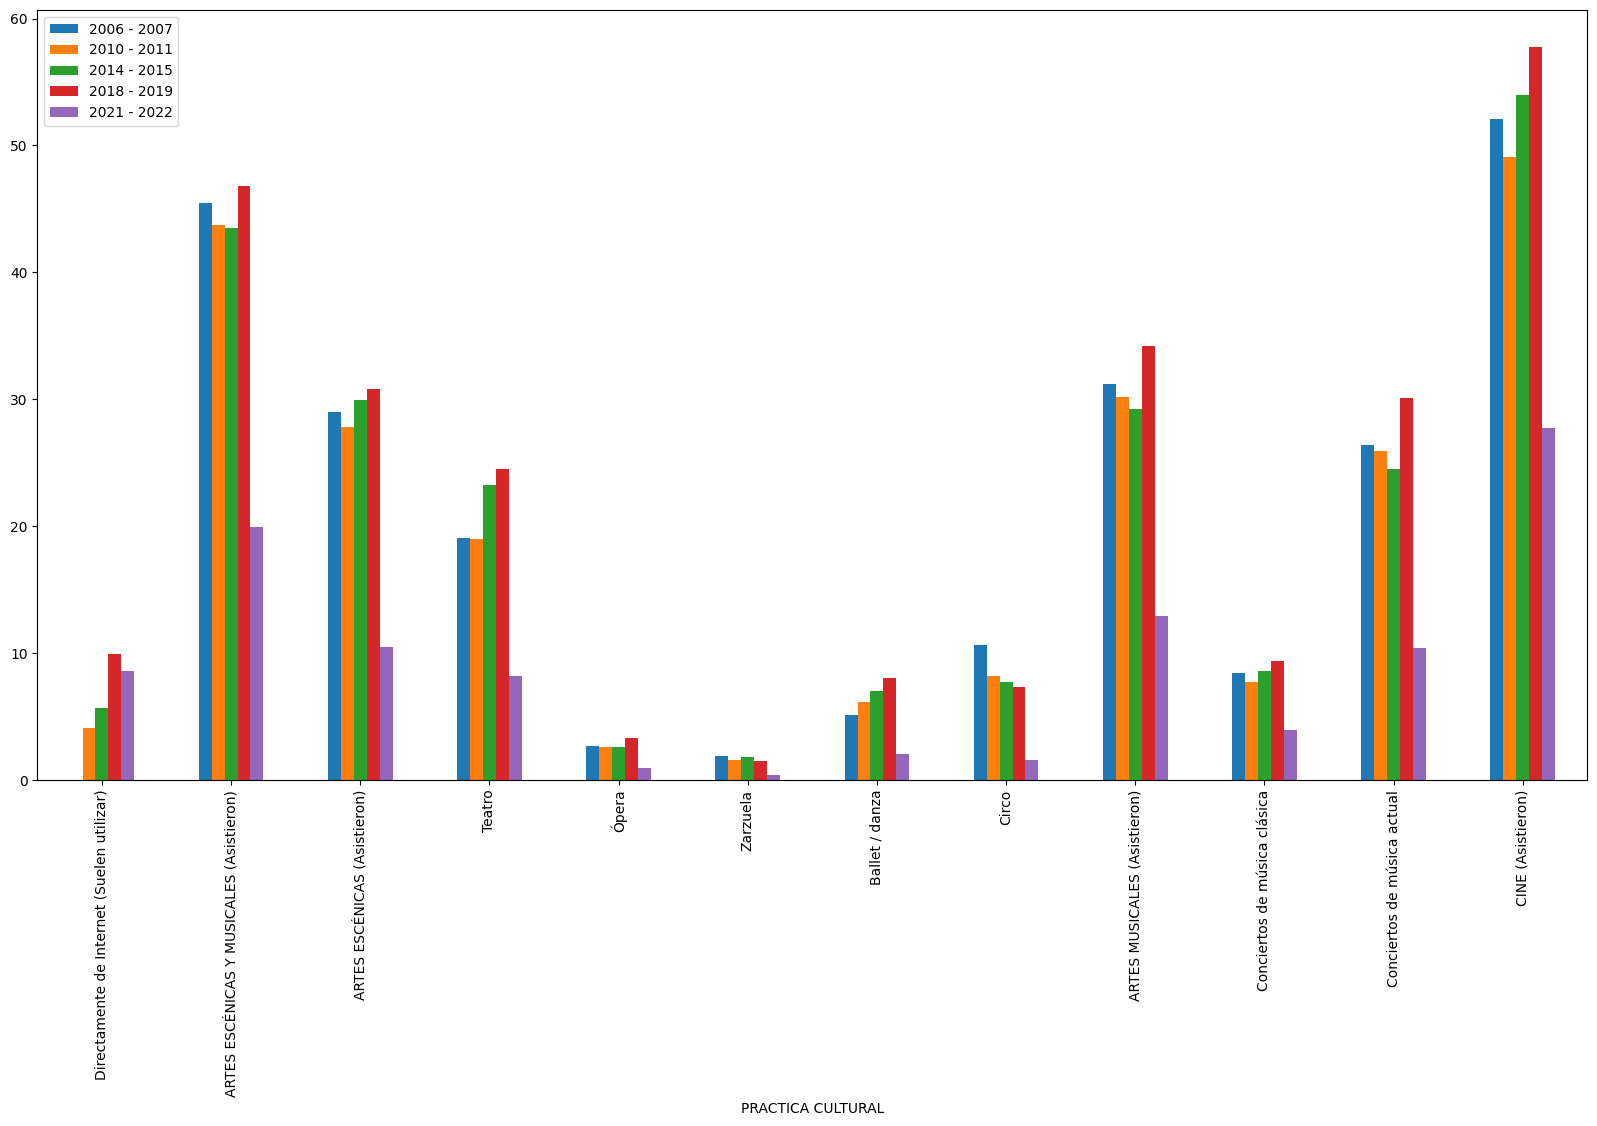

In [174]:
habitos_recort_2.plot(kind="bar", x= 'PRACTICA CULTURAL',figsize = (20,10 ));

In [175]:
habitos_recort_3 = habitos_recort[30:45]

In [176]:
habitos_recort_3.replace('-', np.nan, inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
habitos_recort_3['2006 - 2007'] = [float(str(i).replace(",", ".")) for i in habitos_recort_3['2006 - 2007']]
habitos_recort_3['2010 - 2011'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_3['2010 - 2011']]
habitos_recort_3['2014 - 2015'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_3['2014 - 2015']]
habitos_recort_3['2018 - 2019'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_3['2018 - 2019']]
habitos_recort_3['2021 - 2022'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_3['2021 - 2022']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [178]:
habitos_recort_3

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
30,En el ordenador o directamente de Internet,NaN,17.3,26.2,40.8,43.1
31,PUBLICACIONES PERIÓDICAS (Suelen leer),81.4,80.4,79.7,76.9,71.1
32,Directamente en Internet,14.1,14.4,26.8,42.9,49.0
33,Gratuitas,41.5,37.5,51.8,61.2,58.8
34,Prensa diaria de información general,73.8,71.5,70.4,69.7,65.2
35,Prensa deportiva,25.1,32.8,34.5,34.6,32.5
36,Revistas culturales,15.2,17.7,20.6,22.7,18.9
37,AUDIOVISUALES (Suelen ver o escuchar),NaN,NaN,NaN,NaN,NaN
38,Radio,81.6,77.1,76.8,75.4,66.9
39,Directamente en Internet,NaN,8.4,10.4,13.3,18.4


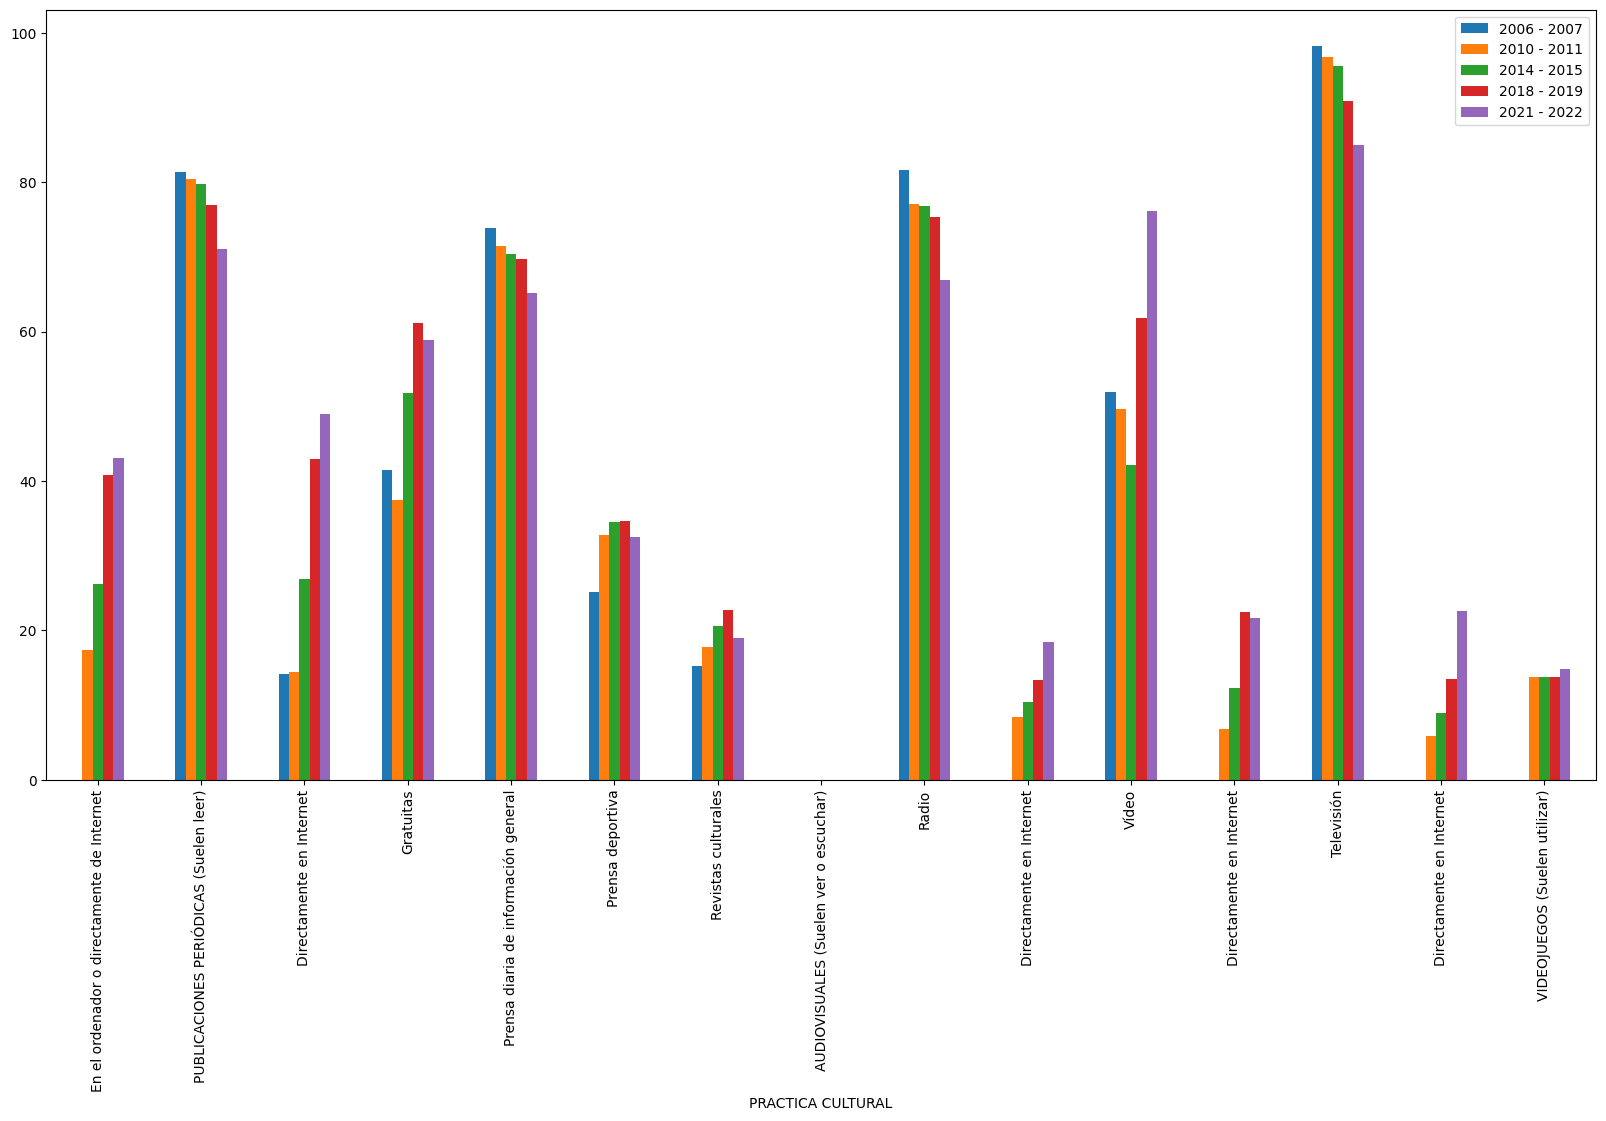

In [179]:
habitos_recort_3.plot(kind="bar", x= 'PRACTICA CULTURAL', figsize = (20,10 ));

In [180]:
habitos_recort_4 = habitos_recort[45:-1]

In [181]:
habitos_recort_4.drop([48], inplace=True)


C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
habitos_recort_4.replace('-', np.nan, inplace=True)
habitos_recort_4.replace(',', '.', inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
habitos_recort_4['2006 - 2007'] = [float(str(i).replace(",", ".")) for i in habitos_recort_4['2006 - 2007']]
habitos_recort_4['2010 - 2011'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_4['2010 - 2011']]
habitos_recort_4['2014 - 2015'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_4['2014 - 2015']]
habitos_recort_4['2018 - 2019'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_4['2018 - 2019']]
habitos_recort_4['2021 - 2022'] =  [float(str(i).replace(",", ".")) for i in habitos_recort_4['2021 - 2022']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [184]:
habitos_recort_4

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
45,NUEVAS TECNOLOGÍAS (Suelen utilizar),NaN,NaN,NaN,NaN,NaN
46,Ordenador o tablet por ocio o tiempo libre,37.7,53.6,62.5,62.3,60.3
47,Internet por ocio o tiempo libre,33.1,52.5,66.9,75.1,81.9
49,Escribir,7.5,7.1,7.8,8.7,6.4
50,Pintar o dibujar,9.2,13.2,13.7,16.1,10.1
51,Otras artes plásticas,4.5,7.7,8.3,10.3,5.2
52,Hacer fotografía,16.6,29.1,28.9,28.8,13.1
53,Hacer vídeo,5.7,12.8,15.0,16.7,7.1
54,Diseño de páginas web,2.2,2.6,3.0,3.2,1.4
55,Hacer teatro,2.1,2.1,2.2,2.2,1.3


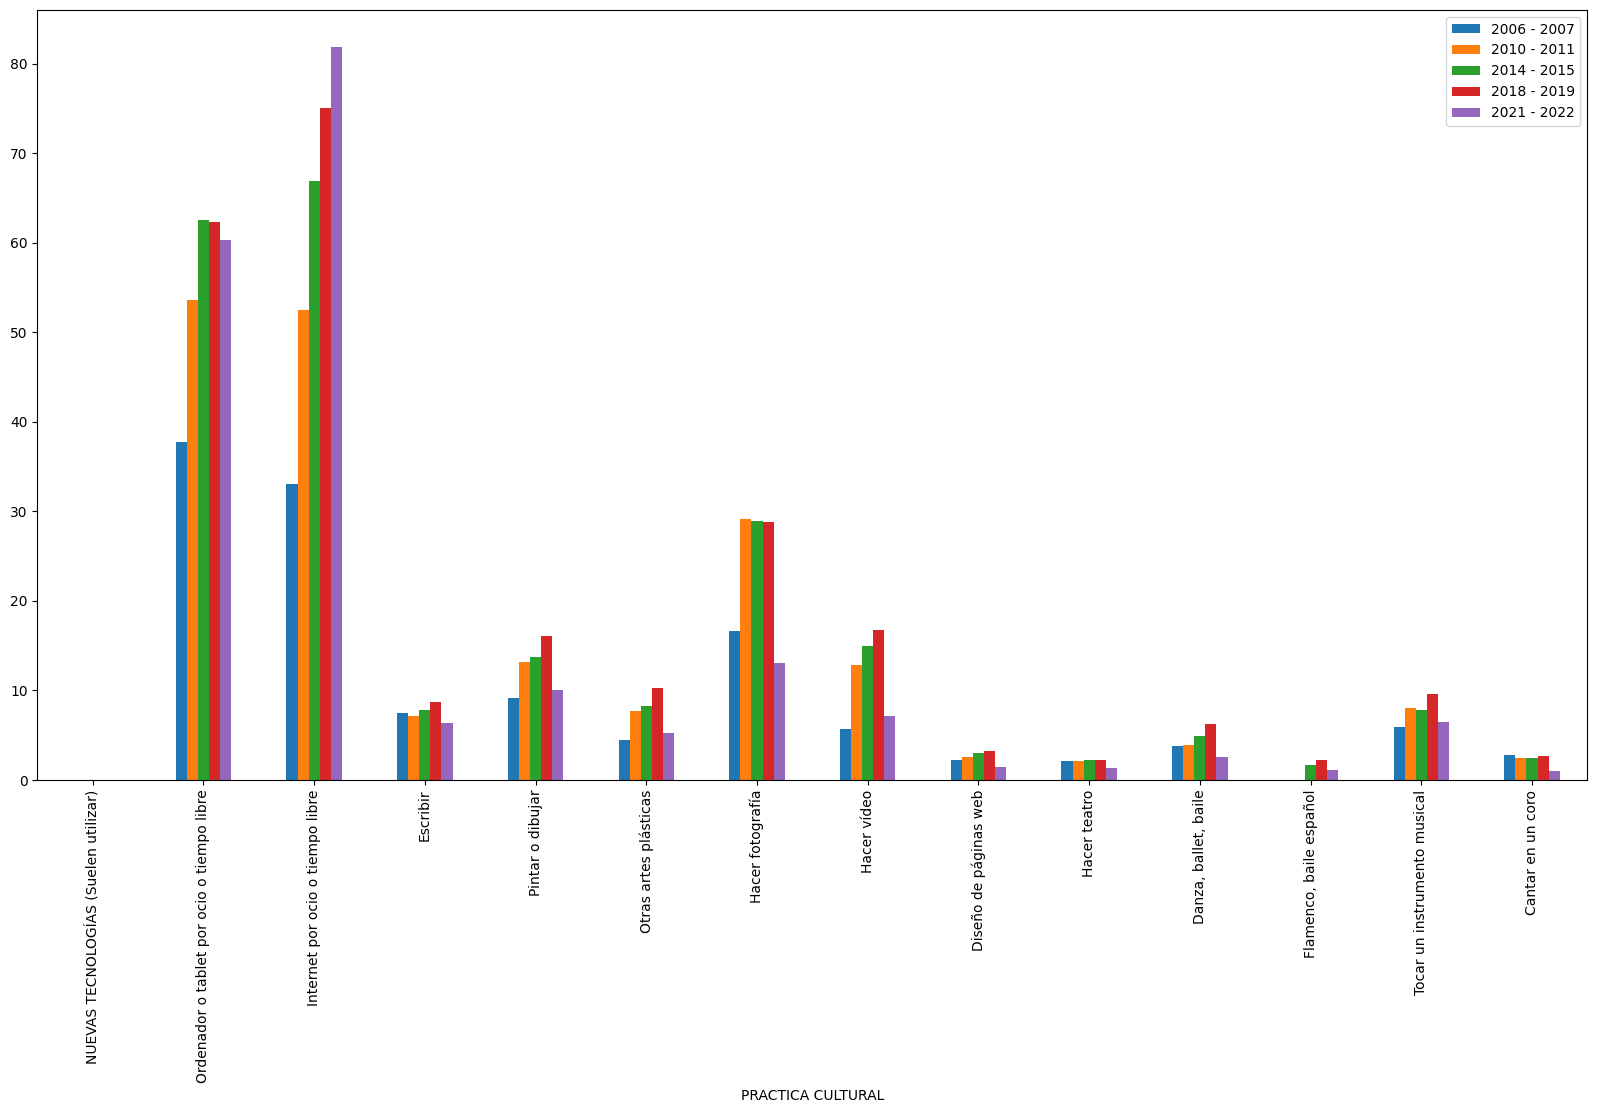

In [185]:
habitos_recort_4.plot(kind="bar", x= 'PRACTICA CULTURAL',figsize = (20,10 ));

In [186]:
habitos_recort_4

,PRACTICA CULTURAL,2006 - 2007,2010 - 2011,2014 - 2015,2018 - 2019,2021 - 2022
45,NUEVAS TECNOLOGÍAS (Suelen utilizar),NaN,NaN,NaN,NaN,NaN
46,Ordenador o tablet por ocio o tiempo libre,37.7,53.6,62.5,62.3,60.3
47,Internet por ocio o tiempo libre,33.1,52.5,66.9,75.1,81.9
49,Escribir,7.5,7.1,7.8,8.7,6.4
50,Pintar o dibujar,9.2,13.2,13.7,16.1,10.1
51,Otras artes plásticas,4.5,7.7,8.3,10.3,5.2
52,Hacer fotografía,16.6,29.1,28.9,28.8,13.1
53,Hacer vídeo,5.7,12.8,15.0,16.7,7.1
54,Diseño de páginas web,2.2,2.6,3.0,3.2,1.4
55,Hacer teatro,2.1,2.1,2.2,2.2,1.3


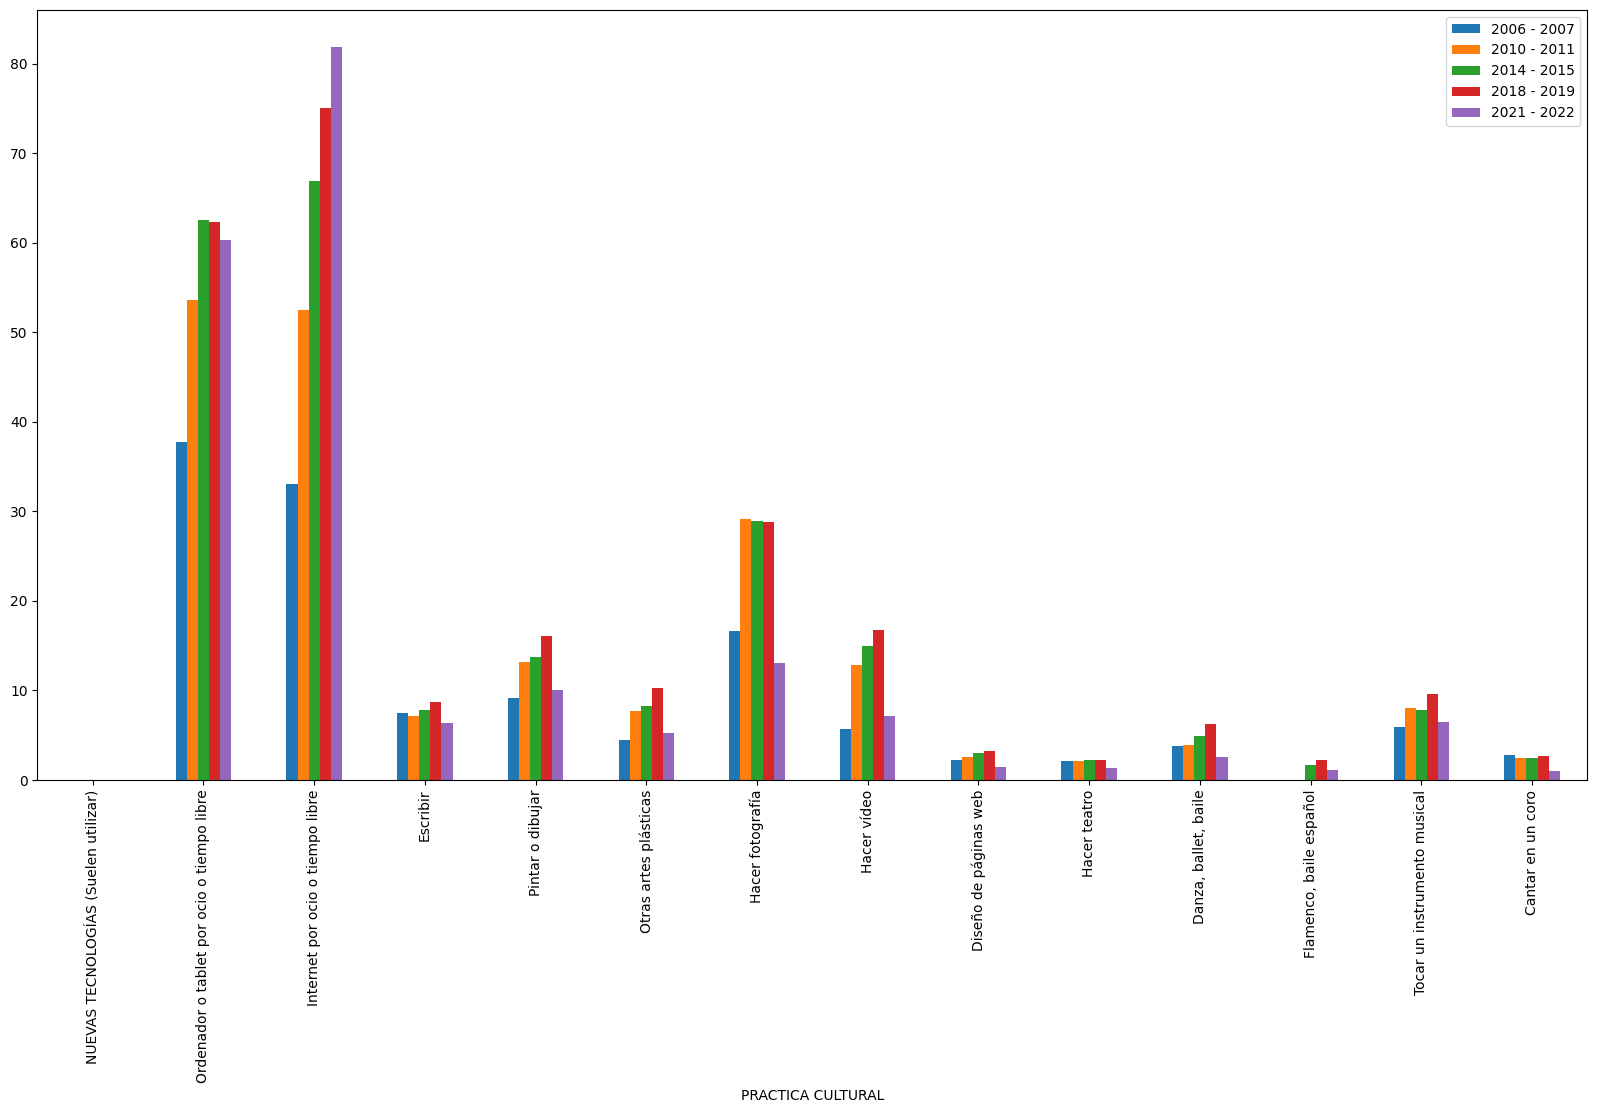

In [187]:
habitos_recort_4.plot(kind="bar", x= 'PRACTICA CULTURAL',figsize = (20,10 ));

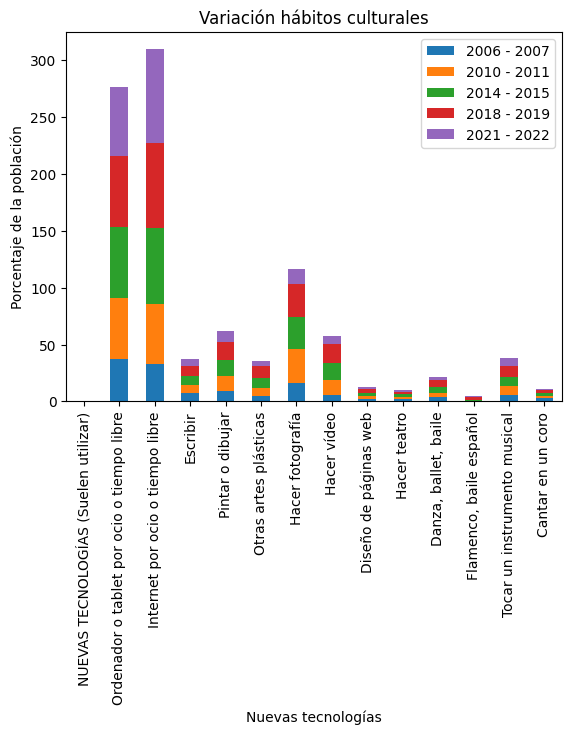

In [188]:
habitos_recort_4.plot(kind="bar", x= 'PRACTICA CULTURAL',stacked = True)
plt.title("Variación hábitos culturales")
plt.xlabel("Nuevas tecnologías")
plt.ylabel("Porcentaje de la población");

TABLA SÉPTIMA: 'Extracción Observatorio Nacional de Tecnología y Sociedad, uso de Tecnologías'

De la ONTSI hemos extraído una serie de datos informativos sobre el uso de las tecnologías en los ciudadanos españoles y cómo las usan tanto personas como empresas.

In [189]:
extraccion_ontsi = pd.read_csv('./data/Extracción ONTSI.csv', encoding= 'latin-1', on_bad_lines='skip', sep=';')

In [190]:
ontsi_sp = extraccion_ontsi[extraccion_ontsi['NOM_GEOGRAFIA'] == 'España']

In [191]:
#quitamos las columnas que no nos sirven
ontsi_sp.drop(columns=['VALOR_DIMENSION','NOM_FUENTE'], inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
ontsi_sp

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
22,Abonados y/o suscriptores de banda ancha móvil,Total año 2004,España,Número de líneas,103000
55,Abonados y/o suscriptores de banda ancha móvil,Total año 2005,España,Número de líneas,951000
100,Abonados y/o suscriptores de banda ancha móvil,Total año 2006,España,Número de líneas,3718000
170,Abonados y/o suscriptores de banda ancha móvil,Total año 2007,España,Número de líneas,10031000
260,Abonados y/o suscriptores de banda ancha móvil,Total año 2008,España,Número de líneas,17314000
...,...,...,...,...,...
481274,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2020,España,% sobre el total de empresas que venden mediante páginas web o apps,44
481275,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2020,España,% sobre el total de ventas de las empresas que venden mediante páginas web o apps,"17,71"
481320,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de empresas,10
481321,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de empresas que venden mediante páginas web o apps,41


In [193]:
#queremos ver el menor año para extraer la información lo más atrás que podamos, para analizar la curva mejor

In [194]:
ontsi_sp['NOM_PERIODO'].min()

'Abril de 2003'

In [195]:
datos_03 = ontsi_sp[ontsi_sp['NOM_PERIODO'] == 'Total año 2003']

In [196]:
#aquí quiero ver las diferencias marcadas entre el año más bajo y el año último registrado del que se han obtenido datos

In [197]:
datos_21 = ontsi_sp[ontsi_sp['NOM_PERIODO'] == 'Total año 2021']

In [198]:
#aquí quiero ver los valores que se han sacado en la recolección de datos del ONTSI, qué se estaba buscando para extraer lo que me interesa
datos_03['NOM_ELEMENTO'].unique()

array(['Accesos a TV de Pago', 'Actividad Endógena del sector TI',
       'Centros educativos con conexión a Internet',
       'Centros educativos con conexión a Internet por tipo de conexión',
       'Cifras de comercio electrónico B2C en España',
       'Cobertura Cablemódem', 'Cobertura total de DSL',
       'Comercio electrónico en la facturación total de las empresas',
       'Cuota de mercado por ingresos totales en telefonía móvil',
       'Digital Opportunity Index (DOI)',
       'Distribución porcentual de los ordenadores por tipo de ordenador en los centros educativos',
       'Distribución porcentual de los ordenadores por utilización preferente en los centros educativos',
       'E-government development index', 'E-participation index',
       'e-readiness', 'Empleados con acceso a Internet',
       'Empleados con habilidades especializadas en las TIC',
       'Empleados que utilizan ordenadores conectados a Internet en su trabajo habitual',
       'Empleados que utilizan o

In [199]:
#aquí estoy buscando las variables de empleo en 2003 para ver el crecimiento
trabajo_03 = datos_03.loc[datos_03['NOM_ELEMENTO'].str.contains('Empleo')]

In [200]:
trabajo_03

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
90876,Empleo en el macrosector TIC,Total año 2003,España,personas,6377
90884,Empleo en el macrosector TIC,Total año 2003,España,personas,4798
90890,Empleo en el macrosector TIC,Total año 2003,España,personas,6425
90896,Empleo en el macrosector TIC,Total año 2003,España,personas,12435
90902,Empleo en el macrosector TIC,Total año 2003,España,personas,81820
90908,Empleo en el macrosector TIC,Total año 2003,España,personas,173872
90914,Empleo en el macrosector TIC,Total año 2003,España,personas,285727
90925,Empleo en el sector de las telecomunicaciones,Total año 2003,España,Número de empleados,88226
90949,Empleo en el sector de las TI,Total año 2003,España,personas,173872
91188,Empleo en el sector servicios (CNAE 93 rev.1),Total año 2003,España,% sobre el empleo total,"64,1"


In [201]:
datos_21

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
2509,Accesos a TV de Pago,Total año 2021,España,número,25531393
2519,Accesos instalados,Total año 2021,España,número,88671802
2938,Accesos instalados,Total año 2021,España,número,77985606
4136,Accesos instalados,Total año 2021,España,número,67990036
4150,Accesos instalados,Total año 2021,España,número,552473
...,...,...,...,...,...
481185,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de empresas que venden mediante páginas web o apps,87
481186,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de ventas de las empresas que venden mediante páginas web o apps,"84,87"
481320,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de empresas,10
481321,Ventas mediante páginas web o apps por parte de las empresas por plataforma,Total año 2021,España,% sobre el total de empresas que venden mediante páginas web o apps,41


In [202]:
trabajo_21 = datos_21.loc[datos_21['NOM_ELEMENTO'].str.contains('Empleo')]

In [203]:
trabajo_21

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
90943,Empleo en el sector de las telecomunicaciones,Total año 2021,España,Número de empleados,60369


In [204]:
trabajo_03_tele = trabajo_03.loc[90925]

In [205]:
trabajo_03_tele.dtype
#veo que es un objeto, no un df, lo transformo

dtype('O')

In [206]:
pd.DataFrame(trabajo_03_tele)

,90925
NOM_ELEMENTO,Empleo en el sector de las telecomunicaciones
NOM_PERIODO,Total año 2003
NOM_GEOGRAFIA,España
NOM_UNIDADES,Número de empleados
VALOR,88226


In [207]:
#en este caso ha descendido el número de empleados en el sector de las TIC

In [208]:
datos_21.loc[datos_21['NOM_ELEMENTO'].str.contains('Inteligencia Artificial')]

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
119399,Empresas que ha considerado adquirir alguna tecnología de Inteligencia Artificial,Total año 2021,España,% sobre el total de empresas,"4,45"


In [209]:
ia_ontsi = datos_21.loc[datos_21['NOM_ELEMENTO'].str.contains('IA')]

In [210]:
ia_ontsi

,NOM_ELEMENTO,NOM_PERIODO,NOM_GEOGRAFIA,NOM_UNIDADES,VALOR
115186,Empresas que emplean IA por procedencia del software o sistema de IA,Total año 2021,España,% sobre el total de empresas,3
115187,Empresas que emplean IA por procedencia del software o sistema de IA,Total año 2021,España,% sobre el total de empresas que utilizan tecnologías de IA,37
115188,Empresas que emplean IA por procedencia del software o sistema de IA,Total año 2021,España,% sobre el total de empresas que utilizan tecnologías de IA,"37,3"
115254,Empresas que emplean IA por procedencia del software o sistema de IA,Total año 2021,España,% sobre el total de empresas,2
115255,Empresas que emplean IA por procedencia del software o sistema de IA,Total año 2021,España,% sobre el total de empresas que utilizan tecnologías de IA,25
...,...,...,...,...,...
127745,Empresas que no usan IA por motivo,Total año 2021,España,% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial,2
127784,Empresas que no usan IA por motivo,Total año 2021,España,% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial,"0,81"
127785,Empresas que no usan IA por motivo,Total año 2021,España,% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial,1
127825,Empresas que no usan IA por motivo,Total año 2021,España,% sobre el total de empresas que no utilizan tecnologías de Inteligencia Artificial,"1,6"


In [211]:
ia_ontsi.drop(columns=['NOM_PERIODO', 'NOM_GEOGRAFIA'], inplace=True)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
ia_ontsi = ia_ontsi[ia_ontsi['NOM_ELEMENTO'].str.contains('Empresas que no usan IA por motivo') == False]
#quiero borrar los valores que contengan ese string especifico porque ya lo he analizado previamente 

In [213]:
ia_ontsi.VALOR.dtypes

dtype('O')

In [214]:
ia_ontsi['VALOR'] = [float(str(i).replace(",", ".")) for i in ia_ontsi['VALOR']]

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
#he tenido que volver a cambiar los valores porque tenían comas en lugar de puntos y no me leían como float sino como object

In [216]:
ia_ontsi.sort_values(by='VALOR', ascending=False)

,NOM_ELEMENTO,NOM_UNIDADES,VALOR
115460,Empresas que emplean IA por procedencia del software o sistema de IA,% sobre el total de empresas que utilizan tecnologías de IA,43.12
115459,Empresas que emplean IA por procedencia del software o sistema de IA,% sobre el total de empresas que utilizan tecnologías de IA,43.00
115789,Empresas que emplean IA por tipo de tecnología,% sobre el total de empresas que utilizan tecnologías de IA,40.56
115627,Empresas que emplean IA por tipo de tecnología,% sobre el total de empresas que utilizan tecnologías de IA,38.57
115188,Empresas que emplean IA por procedencia del software o sistema de IA,% sobre el total de empresas que utilizan tecnologías de IA,37.30
115187,Empresas que emplean IA por procedencia del software o sistema de IA,% sobre el total de empresas que utilizan tecnologías de IA,37.00
115681,Empresas que emplean IA por tipo de tecnología,% sobre el total de empresas que utilizan tecnologías de IA,31.70
115520,Empresas que emplean IA por tipo de tecnología,% sobre el total de empresas que utilizan tecnologías de IA,30.42
115573,Empresas que emplean IA por tipo de tecnología,% sobre el total de empresas que utilizan tecnologías de IA,29.75
115256,Empresas que emplean IA por procedencia del software o sistema de IA,% sobre el total de empresas que utilizan tecnologías de IA,25.48


TABLA OCTAVA: 'Confianza en las IA por parte de las empresas en España'

En esta tabla podemos observar algunos de los avances de la confianza de los ciudadanos en las tecnologías que emplean Internet.

In [217]:
confianza_ia_online  = pd.read_excel('./data/Popurri... Confianza en las IA.xlsx')

In [218]:
confianza_ia_online.drop(confianza_ia_online.iloc[:, 3:17], axis = 1, inplace=True)

In [219]:
confianza_ia_online.replace('-', np.nan, inplace=True)

In [220]:
confianza_ia_online

,Indicadores,Desagregaciones,Áreas Geográficas,Total año 2014,Total año 2015,Total año 2021,Total año 2022
0,Compras mediante comercio electrónico por parte de las empresas (% sobre el total de compras mediante comercio electrónico),Total,España,NaN,NaN,45.24,36.36
1,Compras mediante comercio electrónico por parte de las empresas (% sobre el total de compras),Total,España,NaN,NaN,22.73,24.02
2,Grado de confianza en Internet (% sobre la población que ha usado Internet en los últimos tres meses),Bastante,España,NaN,NaN,56.10,62.00
3,Grado de confianza en Internet (% sobre la población que ha usado Internet en los últimos tres meses),Mucho,España,NaN,NaN,4.60,9.60
4,Grado de confianza en Internet (% sobre la población que ha usado Internet en los últimos tres meses),Poco o nada,España,NaN,NaN,39.30,28.40
5,Grado de confianza en Internet (% sobre la población total),Bastante,España,41.8,48.57,52.70,NaN
6,Grado de confianza en Internet (% sobre la población total),Mucho,España,10.4,6.37,4.30,NaN
7,Grado de confianza en Internet (% sobre la población total),Poco o nada,España,25.2,24.68,36.90,NaN
8,Individuos con habilidades de comunicación avanzadas (% sobre la población que ha usado Internet en los últimos tres meses),Total,España,NaN,NaN,94.00,NaN
9,Individuos con habilidades de comunicación avanzadas (% sobre la población que ha usado Internet en los últimos tres meses),Total,España,NaN,NaN,94.00,NaN


TABLA NOVENA: 'Teletrabajo en España (2021 - 2022)'

In [221]:
teletrabajo = pd.read_excel('./data/Teletrabajo en España (2021-2022).xlsx')

In [222]:
teletrabajo.replace('-', np.nan, inplace=True)

In [223]:
teletrabajo.drop(teletrabajo.iloc[::, 2:5], axis=1, inplace=True)

In [224]:
teletrabajo

,Indicadores,Desagregaciones,Total año 2021,Total año 2022
0,Empleados que teletrabajan regularmente a la semana al menos el 30% de su jornada laboral (% sobre el total de empresas),Total,20.29,NaN
1,Empleados que teletrabajan regularmente a la semana menos del 30% de su jornada laboral (% sobre el total de empresas),Total,9.23,NaN
2,Empresas que permiten la realización de teletrabajo por parte de sus empleados (% sobre el total de empresas),Total,50.56,40.81
3,Personas con incidencias del teletrabajo (% sobre el total de personas),No han teletrabajado aunque su trabajo les permitiría teletrabajar,9.30,10.90
4,Personas con incidencias del teletrabajo (% sobre el total de personas),No han teletrabajado porque su trabajo no les permitiría teletrabajar,34.50,38.80
5,Personas con incidencias del teletrabajo (% sobre el total de personas),Personas que han teletrabajado,9.30,8.10
6,Personas con incidencias del teletrabajo (% sobre el total de personas),Personas que no han trabajado,46.90,42.20


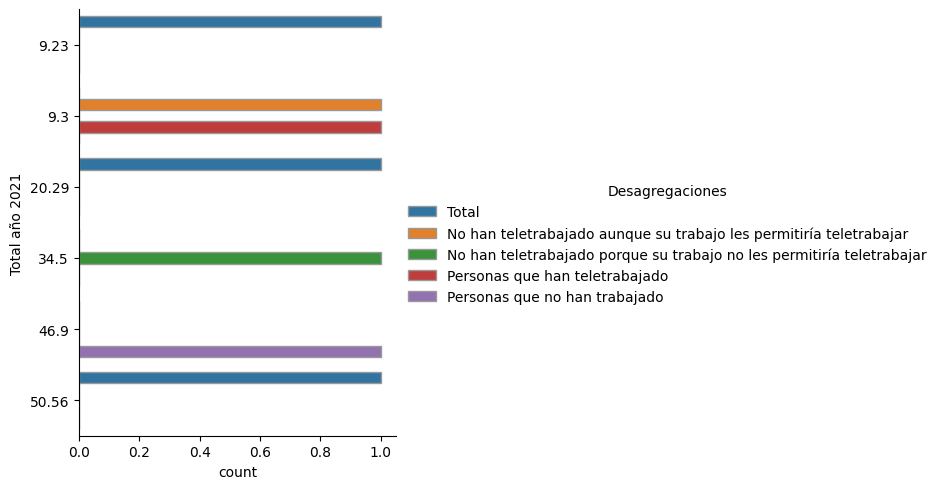

In [225]:
sns.catplot(
            y= 'Total año 2021',          
            hue= 'Desagregaciones',
            kind="count",
            edgecolor=".6",
            orient = "H",
            data=teletrabajo);

TABLA DÉCIMA: 'Fracaso escolar en España (2010 - 2021)'

Cuando nos referimos al fracaso escolar en nuestro país, podemos observar que la cifra desciende conforme avanzan los años. Algo que se puede relacionar con la tabla a continuación, la formación superior ascendente. En cuestión de diez años se ha visto disminuida a la mitad de su porcentaje inicial, como referenciamos a continuación, el mundo nos pide una formación más amplia que antes.

In [226]:
fracaso_escolar = pd.read_csv('./data/fracaso escolar 2010 - 2021.csv', encoding = 'latin-1', sep= '\t')

In [227]:
fracaso_escolar

,Países,Sexo,Periodo,Total
0,España,Mujeres,2021,"9,7"
1,España,Mujeres,2020,"11,6"
2,España,Mujeres,2019,"13,0"
3,España,Mujeres,2018,"14,0"
4,España,Mujeres,2017,"14,5"
...,...,...,...,...
67,UE27_2020,Hombres,2014,"12,7"
68,UE27_2020,Hombres,2013,"13,6"
69,UE27_2020,Hombres,2012,"14,5"
70,UE27_2020,Hombres,2011,"15,2"


In [228]:
fracaso_escolar_sp = fracaso_escolar[fracaso_escolar['Países']== 'España']

In [229]:
fracaso_escolar_sp_muj = fracaso_escolar_sp[fracaso_escolar_sp['Sexo'] == 'Mujeres']

In [230]:
fracaso_escolar_sp_hom = fracaso_escolar_sp[fracaso_escolar_sp['Sexo'] == 'Hombres']

In [260]:
trace1 = go.Scatter(
                    x = fracaso_escolar_sp_muj['Periodo'],
                    y = fracaso_escolar_sp_muj['Total'],
                    name = 'Mujeres',
                    mode= 'lines+markers',
                    marker = dict(color = 'blue'),
                    text = fracaso_escolar_sp_muj['Total'])

# Creating trace2
trace2 = go.Scatter(
                    x = fracaso_escolar_sp_hom['Periodo'],
                    y = fracaso_escolar_sp_hom['Total'],
                    name = 'Hombres',
                    mode= 'lines+markers',
                    marker = dict(color = 'yellow'),
                    text = fracaso_escolar_sp_hom['Total'])

data = [trace1, trace2]

layout = dict(title = 'Abandono temprano de la educación-formación de personas de 18 a 24 años. España',
             xaxis= dict(title= 'Serie 2010 - 2021',ticklen= 10)
           )

fig = go.Figure(data = data, layout=layout)

fig.write_image("./data/tabla6.png", scale=1, width = 1920, height = 1080)

iplot(fig)

TABLA UNDÉCIMA: 'Evolución de los demandantes de empleo ocupados con formación superior (2008 - 2019)'

Con esta tabla mostramos la significativa curva creciente que ha ido ocurriendo desde la entrada de las tecnologías hasta hace tan sólo unos años. El demandante conoce que el mercado evoluciona hacia unos empleos más sofisticados y técnicos, lo que requiere de una formación adecuada y mayores estudios que los que se exigían con anterioridad para poder tener un empleo. 
Esto deriva en una población más culta y preparada.

Aún así, los perfiles a día de hoy no alcanzan la necesidad de las empresas. El último trimestre del último año 2022, declaró el INE según su [Encuesta Trimestral de Coste Laboral](https://www.ine.es/daco/daco42/etcl/etcl0422.pdf), que el número de vacantes sin cubrir rondaba los 140.000, la cifra más alta desde 2013. 


In [255]:
demandantes_formacion_superior = pd.read_csv('./data/asi_ha_evolucionado_el_numero_de_demandantes_de_empleo_ocupados_con_formacion_superior.csv', encoding='utf-8',
             on_bad_lines='skip', sep=';')

In [256]:
demandantes_formacion_superior.dropna(how='any', inplace=True)

In [257]:
demandantes_formacion_superior

,Año,Periodo,Número de demandantes con formación superior
0,2008,Año,111.846
1,2009,Año,127.023
2,2010,Año,153.787
3,2011,Año,160.118
4,2012,Año,166.418
5,2013,Año,168.252
6,2014,Año,161.541
7,2015,Año,160.761
8,2016,Año,164.886
9,2017,Año,177.682


In [259]:
#creamos una tabla interactiva de líneas en la que se muestra claramente el crecimiento

trace1 = go.Scatter(
                    x = demandantes_formacion_superior['Año'],
                    y = demandantes_formacion_superior['Número de demandantes con formación superior'],
                    name = 'citations',
                    mode= 'lines + markers',
                    marker = dict(color = 'purple'),
                    text = demandantes_formacion_superior['Número de demandantes con formación superior'])

data = [trace1]

layout = dict(title = 'Número de demandantes de empleo ocupados con formación superior en España',
             xaxis= dict(title= 'Año',ticklen= 10), yaxis= dict(title= 'Número de personas (miles)',ticklen= 10, 
            
           ))

fig = go.Figure(data = data, layout=layout)

fig.write_html("./data/tabla1.html")

fig.write_image("./data/tabla6.png", scale=1, width = 1920, height = 1080)


iplot(fig)


TABLA DUODÉCIMA: Especialistas en TIC y AI en 2021 - 2022

Aquí seguimos viendo lo que hemos comprobado cuando hablábamos de la insuficiente formación de los jóvenes para el mercado que se avecina con más fuerza cada día. Los especialistas en los nuevos campos aún escasean.

In [236]:
especialistas_tic = pd.read_csv('./data/53964.csv', sep='\t')

In [237]:
especialistas_tic['Total'].replace(',', '.', inplace=True)

In [238]:
especialistas_tic['Total'] = [float(str(i).replace(",", ".")) for i in especialistas_tic['Total']]

In [239]:
especialistas_tic = especialistas_tic.sort_values(by='Total', ascending=False).reset_index(drop=True)

In [240]:
'''así analizamos mejor el dato de los valores más altos a los más bajos, para ver cómo oscilan estas profesiones en nuestro país
le quito el index anterior y le pongo uno nuevo que siga mi orden descendente'''

'así analizamos mejor el dato de los valores más altos a los más bajos, para ver cómo oscilan estas profesiones en nuestro país\nle quito el index anterior y le pongo uno nuevo que siga mi orden descendente'

In [241]:
extraccion_1 = especialistas_tic[2:5]
#extraemos algunos de los valores que nos interesan para demostrar que el empleo está ahí, pero aún carecemos de las habilidades adecuadas

In [242]:
extraccion_1

,Principales variables,Total
2,C.5.B % de empresas cuya dificultad para cubrir vacante especialista TIC fue falta de cualificación adecuada en TIC de los solicitantes (3),77.06
3,C.5.A % de empresas cuya dificultad para cubrir vacante especialista TIC fue falta de solicitudes (3),59.46
4,C.5.C % de empresas cuya dificultad para cubrir vacante especialista TIC fue falta de experiencia laboral adecuada en TIC de los solicitantes (3),54.92


In [253]:
trace1 = go.Scatter(
                    x = extraccion_1['Principales variables'],
                    y = extraccion_1['Total'],
                    name = 'Principales variables',
                    mode= 'lines+markers',
                    marker = dict(color = 'blue'),
                    text = extraccion_1['Total'])

data = [trace1]

layout = dict(title = 'Análisis especialistas TIC',
             
           )

fig = go.Figure(data = data, layout=layout)


iplot(fig)